**Цель исследования.** Обнаружить закономерности, которые позволят снизить отток клиентов банка.

**Задача исследования.** Банки сталкиваются с проблемой оттока клиентов: у клиентов появляются стимулы отказаться от услуг, предоставляемых банком, в пользу другого банка и/или небанковской финансовой организации. С помощью имеющихся данных банка, мы должны выяснить портрет разочаровавшегося клиента, обнаружить недостатки, которые содействуют решению отказа от банка и предложить продукт, который бы минимизировал отток клиентов.  


**План исследования.**

1. Импорт таблицы и библиотек. 
Загрузим таблицу с клиентскими данными и библиотеки, которые позволят прочитать нашу таблицу и выполнить необходимые расчёты с визуализацией. Таблица содержит внутренние данные банка.
2. Предобработка. 
Оценим качество загруженной таблицы на предмет пропусков, дубликатов, выбросов, понятливости наименований столбцов и корректности типов данных в столбцах.
3. Исследовательский анализ данных.
На данном этапе мы произведем вычисления, которые позволят создать общие представления о содержании наших данных: как распределены признаки и какую долю занимают. ИАД будет сопровождаться визуализацией.
4. Сегментация. 
На этапе сегментации все наши манипуляции будет соотносится с поставленной задачей. Мы будем агрегировать наши данные по доступным признакам для поиска закономерностей, которые позволят выдвинуть предположения о причинах оттока клиентов и дать рекомендации для сокращения оттока. 
5. Проведение статистических тестов. 
Мы выдвинем две гипотезы, которые с помощью статистического аппарата подвергнем проверке. Это позволит укрепить (или ослабить) возможные причины оттока, которые были обнаружены на предшествующем этапе сегментации.
6. Подведение итогов.
Мы сформулируем все выясненные проблемы и сопроводим рекомендациями. Дополнительно, сделаем презентацию, где в доступном виде будут представлены наши самые важные заключения и советы для принятия бизнес-решений.


## Загрузка библиотек и таблицы

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
import numpy as np
from plotly import graph_objects as go
import plotly.express as px
from scipy import stats as st


In [2]:
# загружаем датасет
df = pd.read_csv(r'D:\Data\used\bank_scrooge.csv')

In [76]:
df['products'].value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

In [77]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Завершив первичный осмотр, можем заключить: таблица корректно загрузилась, наименования столбцов предстоит изменить, имеются значительное количество пропусков в столбце с данными о дебетовом счете клиентов. Типы данных корректны, однако стоит исправить с вещественных на целочисленные некоторые столбцы.

## Предобработка

Поменяем названия столбцов. Приведем к нижнему регистру и сделаем названия более понятными

In [79]:
df.columns = df.columns.str.lower()

Исправим названия столбцов

In [80]:
df = df.rename(columns={'userid':'user_id',  
                       'est_salary':'estimated_salary'})
df.head(2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0


Изменим типы данных с вещественных на целочисленные.

In [81]:
df['score'] = df['score'].astype('Int64')
df['age'] = df['age'].astype('Int64')

Обработаем дубликаты

In [82]:
df.duplicated().sum()

0

Посмотрим на дубликаты в комбинациях с разными столбцами

In [83]:
#id и город клиента
df[df.duplicated(subset=['user_id', 'city'], keep=False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn


In [84]:
# id клиента и балл кредитного скоринга
df[df.duplicated(subset=['user_id', 'score'], keep=False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
4343,141945,929,Рыбинск,М,33,0,NaN,1,1,0,381868.89,0
6446,222480,776,Ярославль,Ж,38,5,823145.83,2,1,1,55777.44,0
9104,222480,776,Рыбинск,Ж,<NA>,5,796735.09,1,1,1,55073.63,0
9322,221809,917,Рыбинск,М,45,0,NaN,1,1,1,199728.29,0
9457,141945,929,Ярославль,М,<NA>,0,NaN,1,1,0,381868.89,0
9634,221809,917,Ярославль,М,<NA>,0,NaN,1,1,1,192644.15,0


Имеются три дубликата по комбинации id и банковский скоринг. С высокой долей вероятности, это одни и те же люди: один и тот же балл, один и тот же пол, а также либо одинаковое, либо очень близкое значение заработной платы. Возможно, это клиенты, которые переехали из одного города в другой (Рыбинск близок к Ярославлю - в одной области расположены) и актуализировали данные по переезду.

In [85]:
# id клиента и баланс на счету
df[df.duplicated(subset=['user_id', 'balance'], keep=False)].sort_values(by='user_id', ascending=False)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
6412,226550,939,Ярославль,М,34,0,NaN,1,1,1,145913.73,0
8070,226550,940,Рыбинск,М,<NA>,0,NaN,1,0,1,147696.95,0
9634,221809,917,Ярославль,М,<NA>,0,NaN,1,1,1,192644.15,0
9322,221809,917,Рыбинск,М,45,0,NaN,1,1,1,199728.29,0
8632,221197,893,Ярославль,М,<NA>,0,NaN,1,1,0,173929.92,0
440,221197,663,Рыбинск,М,27,0,NaN,1,1,1,172573.13,0
2444,221156,913,Ярославль,М,<NA>,0,NaN,1,1,1,135693.24,0
1389,221156,687,Рыбинск,М,61,0,NaN,1,1,1,136361.72,0
1010,219343,921,Ярославль,Ж,33,0,NaN,1,1,0,159475.61,0
7248,219343,920,Рыбинск,Ж,<NA>,0,NaN,1,1,0,159248.67,0


Поиск дубликатов по комбинации id и баланс на счету, по факту, показал нам совпадения между id и пустыми значениями. Однако есть основания предположить, что все совпадающие пары в столбцах относятся к одному и тому же физическому лицу, поскольку заработная плата у дубликатов очень близка. Есть ещё явная закономерность: у каждой пары дубликатов есть строка, где отсутствует возраст клиента.

Сложнее обстоят дела с скоринг-баллами: у большинства дубликатов они очень близки (разница в несколько пунктов), у меньшинства отличаются в несколько сотен баллов.

In [86]:
# скоринг-баллы и з\п клиента
df[df.duplicated(subset=['score', 'estimated_salary'], keep=False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
4343,141945,929,Рыбинск,М,33,0,NaN,1,1,0,381868.89,0
9457,141945,929,Ярославль,М,<NA>,0,NaN,1,1,0,381868.89,0


Один дубликат. У строк два различия - разный город и пропуск в возрасте. 

Дубликатов по различным комбинациям оказалось немного - около пары десятков в совокупности относительно 10 тысяч строк. Близость у дубликатов такого подчеркнуто индивидуального признака как з/п подталкивает к мысли, что это одни и те же физические лица. 
К тому же, у всех клиентов (за исключением одного с 55 тыс. з\п) выскокие значения з\п: от 130 тыс до 930, что уменьшает вероятность совпадения id и признака разных клиентов. Так же у всех дубликатов различаются города. По всей видимости, это клиенты у которых деловая жизнь завязана на два города: облостной центр - город Ярославль и городе областного подчинения - Рыбинске. 

Посмотрим пропуски.

In [87]:
df.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                   26
equity                 0
balance             2295
products               0
credit_card            0
last_activity          0
estimated_salary       0
churn                  0
dtype: int64

Удалим строки с пустым возрастом. Их немного

In [88]:
df = df.query('not age.isna()')


Удалять пропуски с балансом на счету клиентов не станем - их много и мы лишимся объемной иной информации, которую клиенты с пропусками имеют по всем остальным столбцам. Однако лучше изучим пропуски.

Посчитаем сколько в процентах пропусков в балансе

In [89]:
print('Доля строк с пропусками в балансе', 
      round(df.query('balance.isna()')['user_id'].count() / df['user_id'].count() * 100, 2), '%')

Доля строк с пропусками в балансе 22.85 %


In [90]:
#cоздадим таблицу с пропусками в балансе
na_balance = df.query('balance.isna()')

Посмотрим к какому полу принадлежат клиенты с пропусками

In [91]:
na_sex = na_balance.groupby('gender').size().reset_index(name='count')
#na_sex = na_sex['count'] / na_balance['gender'].count()
na_sex['%'] = round(na_sex['count'] / na_balance['gender'].count() * 100)

na_sex = na_sex.merge(df.groupby('gender').size().reset_index(name='count'), on='gender', how='left').rename(columns={'count_x':'na_count', 'count_y':'all_count' })
na_sex['share'] = round(na_sex['all_count'] / df['gender'].count() * 100)
na_sex

,gender,na_count,%,all_count,share
0,Ж,1007,44.0,4983,50.0
1,М,1272,56.0,4991,50.0


Доля мужчин в пропусках на 12% выше, чем у женщин, хотя М. и Ж. в датасете ровно по 50% 

Посмотрим города клиентов с пропусками

Посмотрим сколько всего по городам и какую долю пропуски в балансе занимают от всех значений у каждого города

In [92]:
# посчитаем и присоединим к таблице общее количество наблюдений по каждому городу
na_city = na_balance.groupby('city').size().reset_index(name='count')
na_city['%'] = round(na_city['count'] / na_balance['city'].count() * 100)
na_city = na_city.merge(df.groupby('city').size().reset_index(name='count'), on='city', how='left').rename(
    columns={'count_x':'na_count', 'count_y':'all_count' })
# добавим столбец, где рассчитам долю пропусков в балансе по каждому городу относительно общего количества данных по городу 
#na_city['na_share'] = round(na_city['na_count'] / na_city['all_count'] * 100)
na_city['share'] = round(na_city['all_count'] / df['city'].count() * 100)
na_city

,city,na_count,%,all_count,share
0,Ростов,235,10.0,1416,14.0
1,Рыбинск,586,26.0,2683,27.0
2,Ярославль,1458,64.0,5875,59.0


Никаких отчетливых результатов нет в изучении долей пропусков по городам: доля пропусков в балансе у клиентов по каждому городу соотносится с долей городов в нашей таблице, с небольшой разницей. В Ярославле на 5% пропусков больше, чем занимаемая доля клиентов из данного города (59%), а в Ростове на 4% меньше, чем доля клиентов по этому городу.

Изучим, каким количеством продуктов пользовались клиенты с пропусками

In [93]:
na_products = na_balance.groupby('products').size().reset_index(name='count')
na_products['%'] = round(na_products['count'] / na_balance['products'].count() * 100)
na_products = na_products.merge(df.groupby('products').size().reset_index(name='count'), on='products', how='left').rename(
    columns={'count_x':'na_count', 'count_y':'all_count' })
na_products['share'] = round(na_products['all_count'] / df['products'].count() * 100)
na_products

,products,na_count,%,all_count,share
0,0,1,0.0,1,0.0
1,1,1934,85.0,3323,33.0
2,2,315,14.0,5119,51.0
3,3,29,1.0,1038,10.0


Подавляющая часть клиентов с пропусками (85%) пользуются одним банковским продуктом, хотя по датасету - это меньшинство клиентов (33%). По всей видимости, пропуски связаны с тем, что это клиенты, которые не нуждаются в дебетовом счете, поскольку они заинтересованы в иных услугах: например, инвестиционный счет или валютный, поккупка кредититов и тд.

In [94]:
na_credit_card = na_balance.groupby('credit_card').size().reset_index(name='count')
na_credit_card['%'] = round(na_credit_card['count'] / na_balance['credit_card'].count() * 100)
na_credit_card = na_credit_card.merge(df.groupby('credit_card').size().reset_index(name='count'), 
                                      on='credit_card', how='left').rename(
    columns={'count_x':'na_count', 'count_y':'all_count' })
na_credit_card['share'] = round(na_credit_card['all_count'] / df['credit_card'].count() * 100)
na_credit_card

,credit_card,na_count,%,all_count,share
0,0,421,18.0,3190,32.0
1,1,1858,82.0,6784,68.0


In [95]:
#активны ли данные пользователи, посмотрим
na_balance.groupby('churn').size()

churn
0    2266
1      13
dtype: int64

Почти все пользователи не являются ушедшими

Получается, 85% клиентов с пропусками в дебетовом балансе пользуются одним банковским продуктом и 82% клиентов с пропусками имеют кредитную карту. Становится яснее: на большую часть (свыше 80%) клиентов с пропусками приходятся клиенты, которым интересны банковские кредитные условия (доступность, низкие проценты и тд) и это единственное, что их интересует в банке.

Но в банке имеется еще 15%, которые используют более одного продукта и 18% у которых нет кредитной карты. Можем предположить, что это клиенты: 
1. Пользуются иными услугами банка, к которым не относится открытый дебетовый счет и кредитные услуги: инвест счет, валютный и тд;
2. При различных манипуляциях с базой данных пропуски в балансе оказались у клиентов у которых нет средств на счету, а также клиенты, которые открыли счет, но ни разу не положили на него денежные средства;
3. Клиенты у которых были заморожены денежные средства.

Изучим выбросы.

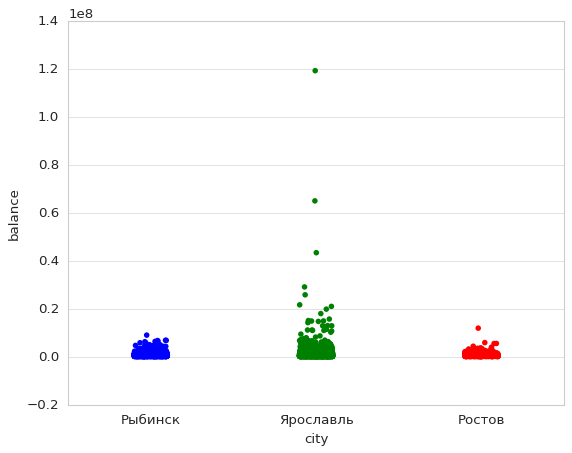

In [96]:
sns.stripplot(x='city', y='balance', data=df) 

plt.show()

Имеются выбросы у клиентов из городов Ярославль (больше всего выбросов) и Ростов. Посмотрим, что это за клиенты

In [97]:
# клиенты Ярославля с балансом больше 20 млн
df.query('city == "Ярославль" and balance >= 20000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
1059,114103,894,Ярославль,М,58,4,6.486621e+07,2,1,1,88861.60,1
1846,114088,927,Ярославль,М,57,5,4.327710e+07,3,0,1,82619.00,0
4721,228786,1000,Ярославль,М,45,5,2.900893e+07,2,0,1,811804.54,0
6948,137434,1000,Ярославль,М,37,4,2.090616e+07,2,1,1,947606.60,1
7597,156149,900,Ярославль,М,62,5,1.191136e+08,2,1,1,138041.31,0
8484,221720,1000,Ярославль,Ж,35,5,2.154994e+07,2,0,0,1051902.65,0
9753,122015,885,Ярославль,М,64,4,2.572776e+07,3,1,0,168746.90,0


У нас 7 клиентов из Ярославля со счетом больше 20 млн., 6 из них мужчины. Это клиенты 35 + лет, 5 из выше 45 лет. Зарплата у всех выше средней и имеет сильный разброс - от 80 тыс, до свыше 1 млн. Все клиенты имеют большое количество объетов собственности (от 4 до 5)

Удалим выбросы

In [98]:
# Добавим заглушку в balance для пропусков, чтобы при удалении выбросов не удалить строки с пропусками
df['balance'] = df['balance'].fillna(-666)

# удаляем клиентов, с балансом выше 20млн
df = df.query('balance <= 20000000')

Посмотрим ростовских клиентов с выбросами. 

In [99]:
df.query('city == "Ростов" and balance >=10000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
3180,193249,960,Ростов,М,47,5,11834882.67,2,0,1,507039.17,1


Из Ростова один выброс - клиент с балансом 11.8 млн. Клиент имеет высокую з\п - выше 500 тыс, 5 объектов собственности, высокий рейтинг (960). Удалим данные с ним.

In [100]:
df = df.query('user_id != 193249' )

Посмотрим на выбросы по возрасту клиента и балансу

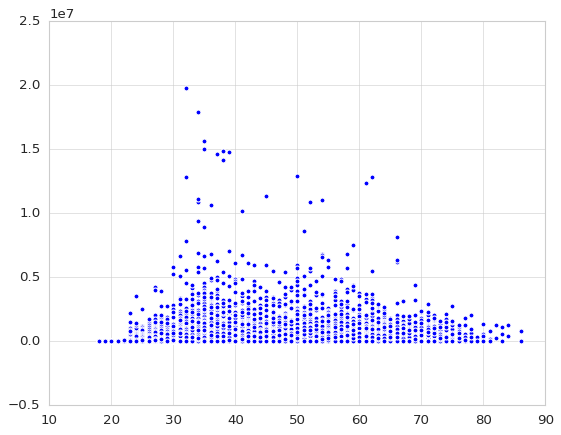

In [101]:
plt.scatter(df['age'], df['balance']) 


У всех возрастов есть выбросы по балансу, т.е. значения, которые сильно удалены от большинства других значений. Для всех возрастов можно обозначить общий пол с выбросом в районе 5 млн на счету. Посмотрим сколько таких значений и отсеим их, если немного

In [102]:
df.query('balance >= 5000000').shape

(64, 12)

Удалим 64 строки

In [103]:
df = df.query('balance <= 5000000')

Изучим выбросы по заработной плате клиента

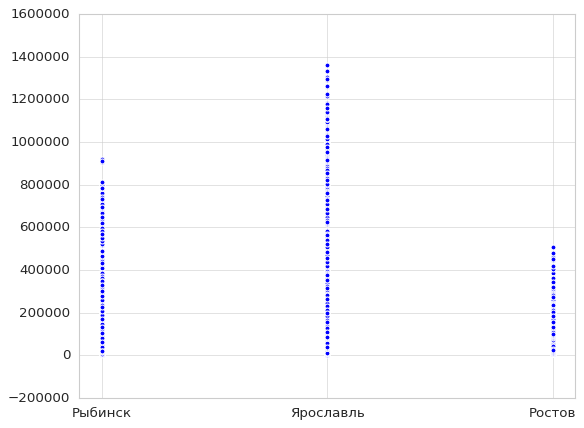

In [104]:
plt.scatter(df['city'], df['estimated_salary']) 


Есть выбросы  у клиентов из Рыбинска с з/п выше 900 тыс

Посмотрим сколько таких пользователей

In [105]:
df.query('city == "Рыбинск" and estimated_salary >= 900000').shape

(3, 12)

Удалим их

In [106]:
df = df.query('city != "Рыбинск" or estimated_salary <= 900000')

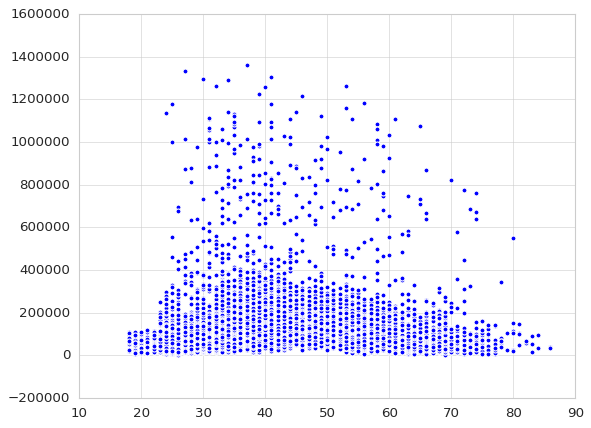

In [107]:
plt.scatter(df['age'], df['estimated_salary']) 


Есть выбросы для каждого возраста, кроме диапозона 20-30 лет. Можно отсечь данные по з\п >= 500 тыс. - данная з\п является выбросом для каждого возраста. Узнаем, сколько таких клиентов и удалим, если немного

In [108]:
df.query('estimated_salary >= 500000').shape

(221, 12)

Удаляем клиентов с з\п выше 500 тыс

In [109]:
df = df.query('estimated_salary <= 500000')

Изучим выбросы в разрезе по полу клиента

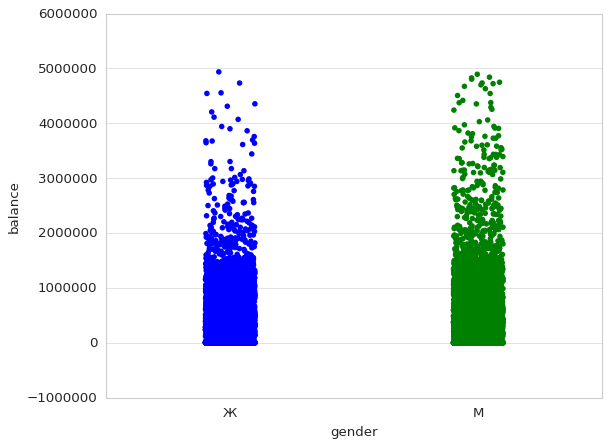

In [110]:
sns.stripplot(x='gender', y='balance', data=df) 

plt.show()

Отсеим клиентов с балансом выше 2.5 млн

In [111]:
df.query('balance >= 2500000').shape

(196, 12)

In [112]:
df = df.query('balance <= 2500000')

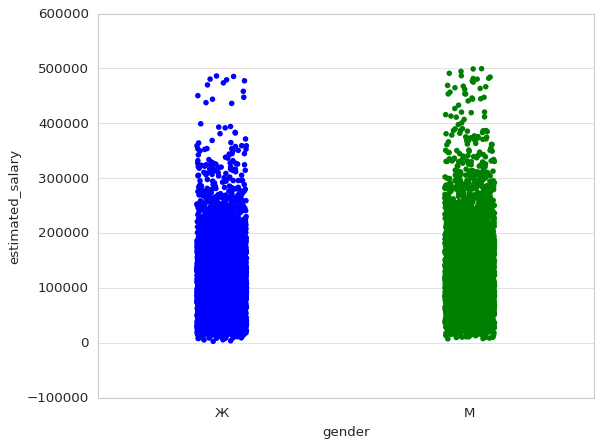

In [113]:
sns.stripplot(x='gender', y='estimated_salary', data=df) 

plt.show()

Отсеим пользователей с з\п выше 350 тыс

In [114]:
df.query('estimated_salary >= 350000').shape

(109, 12)

In [115]:
df = df.query('estimated_salary <= 350000')

Посмотрим, сколько у нас отсалось данных относительно первоночальных

In [116]:
print('Доля оставшихся строк относительно импортированных:',  round(df['user_id'].count() / 10000 * 100),'%')

Доля оставшихся строк относительно импортированных: 94 %


Мы завершили предобработку таблицы. В этой части мы изменили названия некоторых столбоцов и привели их к нижнему регистру. Изменили типы данных столбцов с вещественных на целочисленные. При изучении дубликатов по различным комбинациям мы выявили в районе двух десятко строк, которые, вероятно, относятся к одним и тем же физлицам. Мы не стали удалять дубликаты: во-первых, их немного, а во-вторых, нет уверенности, что это разные клиенты - есть отличные признаки, а также все почти все наши комбинации поиска дубликатов были связаны с user_id и при возможной ошибки присвоения одного и того же id разным клиентам мы рискуем удалить разных клиентов.

Наша таблица содержала пропуски в столбцах с возрастом и балансом на счету. Пропуски в возрасте мы удалили, поскольку их было мало - 26, а балансовые оставили из-за нежелания отказаться от весомой доли клиентской информации - 23% клиентов имеют пропуски в данном столбце. Мы исследовали пропуски и пришли к выводу, что они, в основе своей, связаны с клиентами, которым важна одна конкретная услуга - кредитная.

Мы изучили выбросы в балансе и з\п  для клиентов из различных городов, по принадлежности к полу и возрасту и отсеили их. Наши данные стали на 6% меньше загруженных.

## Приступим к  анализу данных

Посмотрим, сколько клиентов в каждом городе и какую долю каждый город занимает в наших данных

### География клиентов

In [117]:
df.groupby('city').size().reset_index(name='count')

,city,count
0,Ростов,1388
1,Рыбинск,2554
2,Ярославль,5431


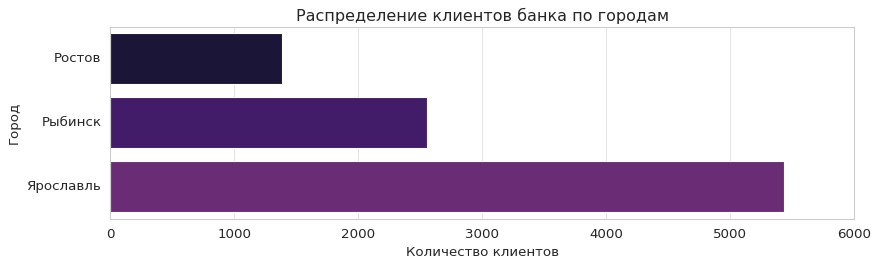

In [118]:
plt.figure(figsize=(12,3))
sns.set_style('whitegrid')
palette = ('magma')
city_distribution = sns.barplot(x='count', y='city', 
                                    data=df.groupby('city').size().reset_index(name='count'), 
                                    palette=sns.color_palette(palette, 8))
city_distribution.set_title("Распределение клиентов банка по городам")
city_distribution.set_xlabel('Количество клиентов')
city_distribution.set_ylabel('Город')

plt.show()

Больше всего клиентов из Ярославля - 5.4 тыс, на втором месте - Рыбинск - 2.5 тыс, меньше всего в Ростове - 1.4 тыс.

Построим круговую диаграмму, которая покажет какую долю в датасете занимают клиенты из разных городов

In [119]:
fig = go.Figure(data=[go.Pie(labels=df.groupby('city').size().reset_index(name='count')['city'], 
                             values=df.groupby('city').size().reset_index(name='count')['count'],
                             hole=.228)])
fig.update_layout (title='Доли клиентов по каждому городу')
fig.show() 

Мы видим, что банк лучше всего представлен в Ярославской области, поскольку на два города области - Ярославль и Рыбинск, приходится 85% клиентов (58% и 27% соответственно). Клиентов из Ростова всего 15%, хотя население и, следовательно, потенциальных клиентов Ростова превышает на несколько сотен тысяч совокупное население Ярославля и Рыбинск.

Скромное количество клиентов из Ростова может быть следствием недавним появлением банка в регионе.

### Исследуем пол клиентов

Посмотрим, сколько всего мужчин и женщин в таблице и как пол клиента распределен по городам

In [120]:
df.groupby('gender').size().reset_index(name='count')

,gender,count
0,Ж,4752
1,М,4621


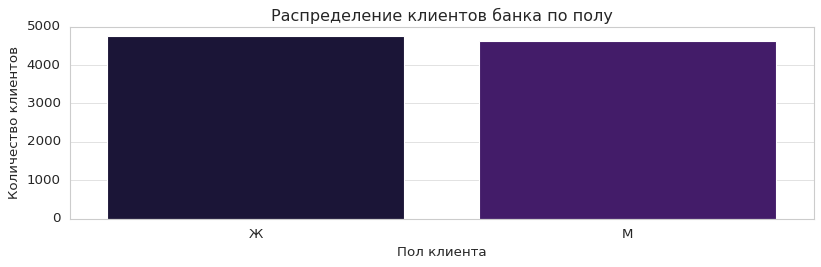

In [121]:
plt.figure(figsize=(12,3))
sns.set_style('whitegrid')
palette = ('magma')
sex_distribution = sns.barplot(x='gender', y='count', 
                                    data=df.groupby('gender').size().reset_index(name='count'), 
                                    palette=sns.color_palette(palette, 8))
sex_distribution.set_title("Распределение клиентов банка по полу")
sex_distribution.set_xlabel('Пол клиента')
sex_distribution.set_ylabel('Количество клиентов')

plt.show()

Мужчин и женщин примерно поровну, с небольшим перевесом в сторону женщин

Посмотрим на соотношение мужчин и женищин по городам

In [122]:
df.groupby(['city', 'gender']).size().reset_index(name='count')

,city,gender,count
0,Ростов,Ж,723
1,Ростов,М,665
2,Рыбинск,Ж,1316
3,Рыбинск,М,1238
4,Ярославль,Ж,2713
5,Ярославль,М,2718


In [123]:
fig = px.bar(df.groupby(['city', 'gender']).size().reset_index(name='count'), x='city', y='count',
             color='gender',
             barmode='group',
             title='Количество мужского и женского населения по городам',
             
             )

fig.update_xaxes(tickangle=15)
fig.update_xaxes(title_text='Пол и город клиента')
fig.update_yaxes(title_text='Количество клиентов')

fig.show() 

Доли клиентов мужского пола в зависимости от города имеет ту же картину, что и общее разделение: от каждого из городов примерно половина женщин и мужчин. В Ростове и Рыбинске немного больше женщин, а в Ярославле всего на 5 клиентов больше мужчин.

### Изучим возраст 

Изучим возраст наших клиентов. Посмотрим распределение

In [124]:
fig = px.bar(df.groupby('age').size().reset_index(name='count'), x='age', y='count', 
             
             title='Распределение клиентов банка по возрасту')
fig.update_xaxes(tickangle=10)
fig.update_xaxes(title_text='Возраст клиента')
fig.update_yaxes(title_text='Количество клиентов данного возраста')
fig.show() 

Распределение имеет правый хвост.
Самая большая группа клиентов в возрасте 36 лет.
Самый многочисленный возрастной диапозон - 32-37 лет
Клиенты, перешагнувшие порог совершеннолетия, не очень заинтересованы в банке: рост начинается только после 22 лет. 
Диапозон от 47 до 61 лет стабильный: с небольшими просадками и восстановлниями.

### Изучим дебетовый счет наших клиентов

Посмотрим на распределение клиентов по балансу и з\п

In [125]:
fig = px.histogram(df.query('balance != -666'),
             x='balance',
                    
             nbins=50,
             
             title='Распределение клиентов банка по балансу на счету')
fig.update_xaxes(tickangle=10)
fig.update_xaxes(title_text='Количество денег на счету')
fig.update_yaxes(title_text='Количество клиентов')
fig.show() 

Достаточно состоятельные клиенты, пик - около 350 тыс. Распределение имеет правую боковину: основная часть пучкуется с левой стороны.

Посмотрим на распределение по полу денег на счету

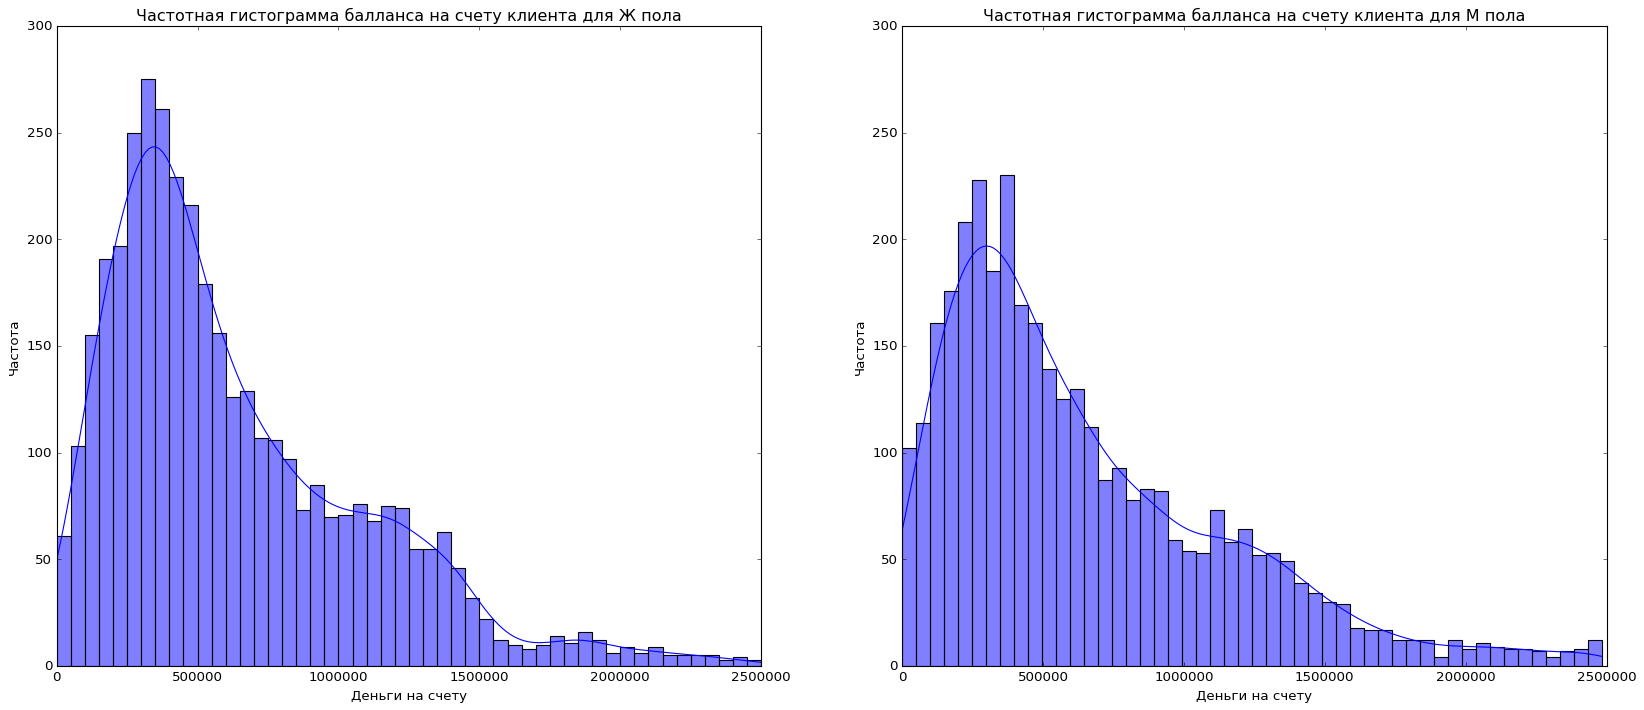

In [126]:
plt.figure(figsize=(25, 10))
plt.style.use('classic')
for x, gender in enumerate(df['gender'].unique()):
    sns.histplot(df.query('balance != -666 and gender == @gender'),
                 x='balance',
                 kde=True,
                 bins=50,
                 ax=plt.subplot(1, 2, x + 1))
    plt.title('Частотная гистограмма балланса на счету клиента для {} пола'.format(gender))
    plt.ylabel('Частота')
    plt.ylim(0, 300)
    plt.xlabel('Деньги на счету')
    
plt.show()

Для мужчин и женщин формы распределения похожи. Для мужчин пики находятся правее - в районе 350 тыс, а для женщин в районе 300 тыс. Основная часть для женщин расположена в диапозоне 150-650 тыс, а для мужчин - 50-750 тыс. Иными словами, мужчин с большим количеством денег на счету больше. 

### Изучим заработную плату

Посмотрим на распределение заработной платы

In [127]:
fig = px.histogram(df,
             x='estimated_salary',
                    
             nbins=100,
             
             title='Распределение клиентов банка заработной плате')
fig.update_xaxes(tickangle=10)
fig.update_xaxes(title_text='З\п клиента')
fig.update_yaxes(title_text='Количество клиентов')
fig.show() 

Пик - 70-75 тыс. Основная часть - 25 - 190 тыс. После 190 тыс начинается обвал за которым следует плавное снижение часостот.

Посмотрим на распределение з\п по полу

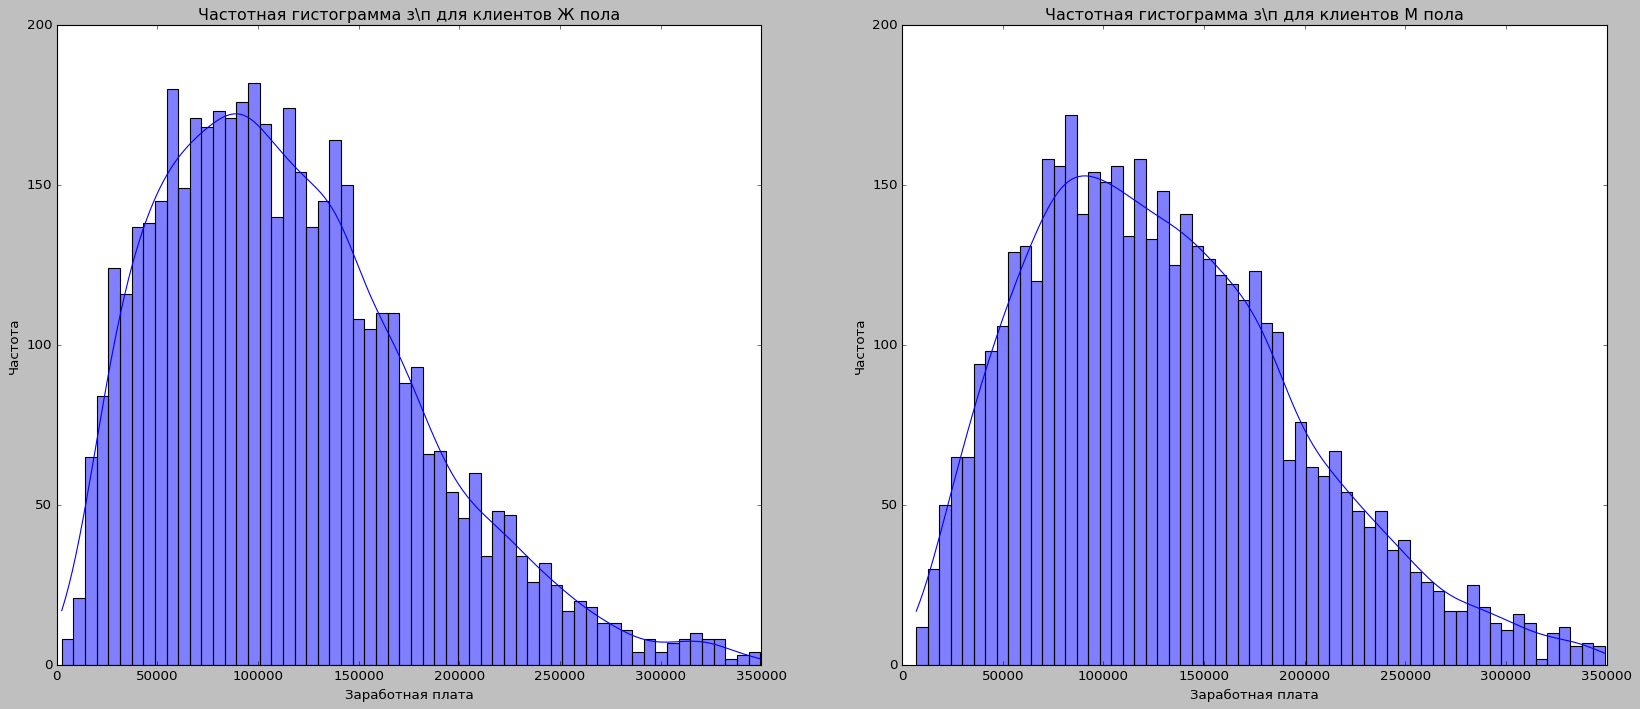

In [128]:
plt.figure(figsize=(25, 10))
plt.style.use('classic')
for x, gender in enumerate(df['gender'].unique()):
    sns.histplot(df.query('gender == @gender'),
                 x='estimated_salary',
                 kde=True,
                 bins=60,
                 ax=plt.subplot(1, 2, x + 1))
    plt.title('Частотная гистограмма з\п для клиентов {} пола'.format(gender))
    plt.ylabel('Частота')
    plt.ylim(0, 200)
    plt.xlabel('Заработная плата')
    
plt.show()

Форма распределения з\п напоминает нормальное распределение с небольшой правой боковиной. 
У женщин пик выше, чем у  мужчин - 100 тыс и около 60 тыс, у мужчин - в районе 80 тыс. У мужчин распределение основной части более широкое - равномернее распределено большое количество значений среди различных диапозонов з\п.

### Рейтинг клиентов банка

Посмотрим на распределение скорингового рейтинга

In [129]:
fig = px.histogram(df,
             x='score',
                    
             nbins=100,
             
             title='Распределение клиентов банка по скоринговому рейтингу')
fig.update_xaxes(tickangle=10)
fig.update_xaxes(title_text='Скоринговый рейтинг')
fig.update_yaxes(title_text='Количество клиентов')
fig.show() 

Основная часть - 770 - 920.
Пик - 895.
Минимальные рейтинг 640, однако клиентов с таким рейтингом очень мало - примерно столько же, как и с максимум - 1000.

Посмотрим на распределение по полу

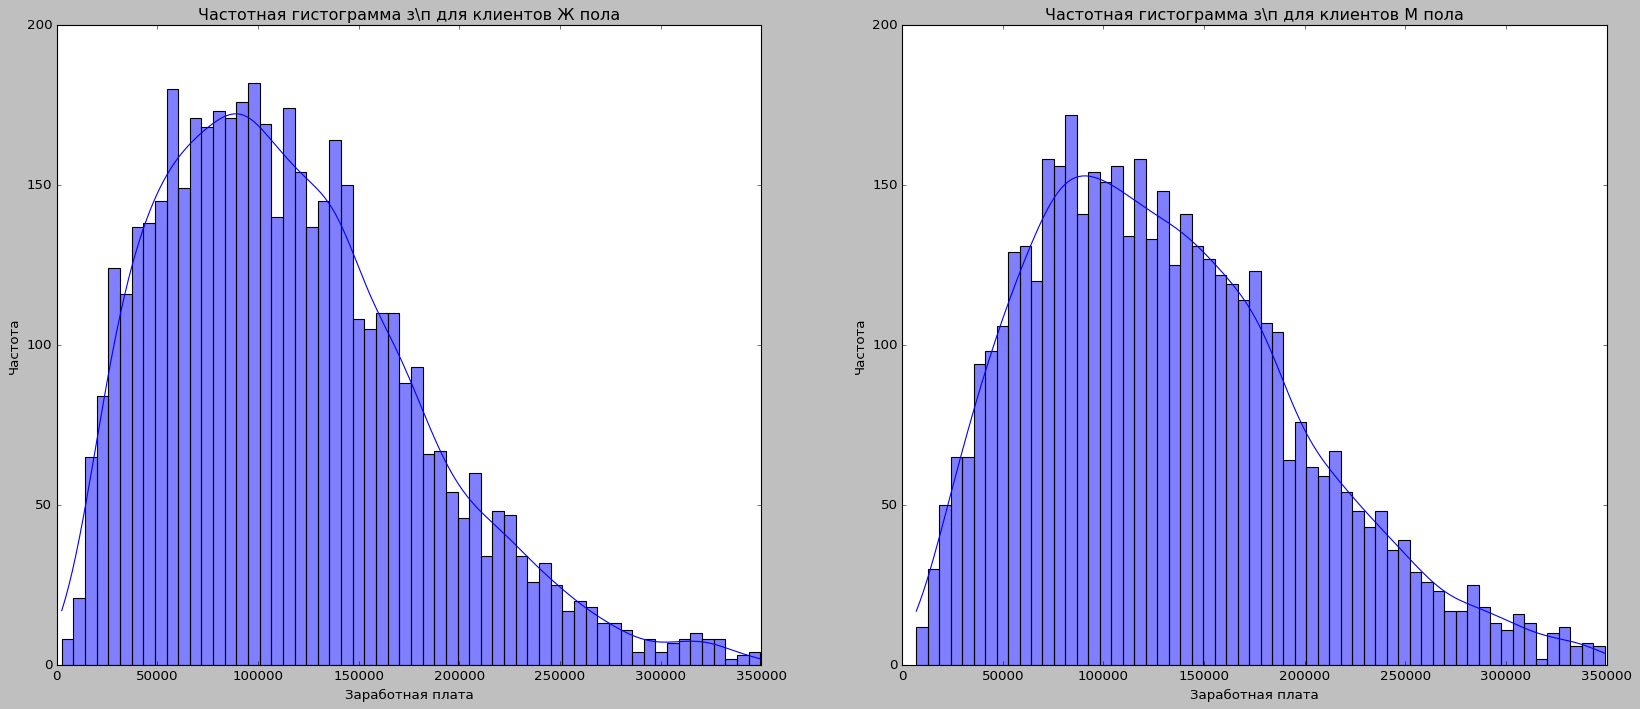

In [130]:
plt.figure(figsize=(25, 10))
plt.style.use('classic')
for x, gender in enumerate(df['gender'].unique()):
    sns.histplot(df.query('gender == @gender'),
                 x='estimated_salary',
                 kde=True,
                 bins=60,
                 ax=plt.subplot(1, 2, x + 1))
    plt.title('Частотная гистограмма з\п для клиентов {} пола'.format(gender))
    plt.ylabel('Частота')
    plt.ylim(0, 200)
    plt.xlabel('Заработная плата')
    
plt.show()

Пики у женщин и мужчин совпадают - 900. Гистограммы похожи, с основной частью 780-930, у мужчин имеется падение небольше в диапозоне 840-880, у женщин такиих падений два - 810 - 840 и 860-880

### Узнаем, сколько продуктов выбирают наши клиенты

Посмотрим распределение клиентов по количеству продуктов

In [131]:
products_count = df.groupby('products').size().reset_index(name='count').sort_values(by='count', ascending=False)
products_count

,products,count
2,2,4885
1,1,3077
3,3,968
4,4,423
5,5,19
0,0,1


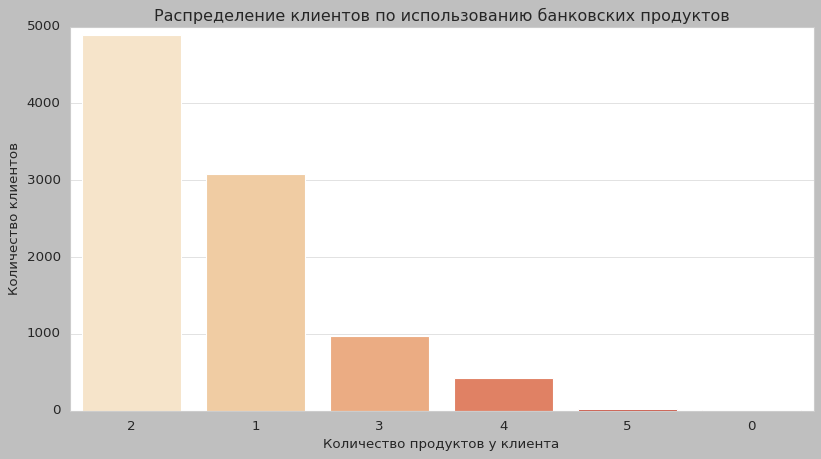

In [132]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
one = sns.barplot(x='products', y='count', 
                  data=products_count,
                  order=products_count.sort_values('count',ascending = False).products,
                  palette='OrRd')
one.set_title("Распределение клиентов по использованию банковских продуктов")
one.set_xlabel('Количество продуктов у клиента')
one.set_ylabel('Количество клиентов')

plt.show()

Подовляющее большинство клиентов пользуется двумя продуктами - 4885 клиентов.
На втором месте с одним продуктом - 3077 клиента.
С тремя продуктами - 968 клиентов.
С четырьмя - 423.
С пятью - всего 19.

### Узнаем больше о носителя кредитной карты

Посмотрим, какое количество клиентов являются носителями кредитной карты

In [133]:
credit_count = df.groupby('credit_card').size().reset_index(name='count')
credit_count['type'] = ['no credit card', 'have a credit card']
credit_count

,credit_card,count,type
0,0,2967,no credit card
1,1,6406,have a credit card


In [134]:
fig = go.Figure(data=[go.Pie(labels=credit_count['type'], values=credit_count['count'], hole=.123)])
fig.update_layout (title='Доли клиентов с кредитной картой и без кредитной карты')
fig.show() 


Большая часть имеют кредитную карту - 68% клиентов. Отсутствует кредитная карта у 32% пользователей.

Изучим носителей кредитных карт по полу, городам и возрасту

In [135]:
sex_credit_card =  df.groupby(['gender', 'credit_card']).size().reset_index(name='count')
sex_credit_card

,gender,credit_card,count
0,Ж,0,1802
1,Ж,1,2950
2,М,0,1165
3,М,1,3456


In [136]:
sex_credit_card['type'] = sex_credit_card['credit_card'].apply(lambda x: 'no credit card' if x == 0 
                                                               else ('have a credit card'))
sex_credit_card

,gender,credit_card,count,type
0,Ж,0,1802,no credit card
1,Ж,1,2950,have a credit card
2,М,0,1165,no credit card
3,М,1,3456,have a credit card


In [137]:
fig = px.bar(sex_credit_card, 
             x='gender', y='count',
             color='type',
             #barmode='group',
             title='Количество клиентов по наличию и отсутствию кредитной карты',
             
             )

fig.update_xaxes(tickangle=15)
fig.update_xaxes(title_text='Пол клиента')
fig.update_yaxes(title_text='Количество клиентов')

fig.show() 

Большинство клиентов и мужского и женского пола имеют креидтную карту, но среди женщин больше доля не имеющих.

Посмотрим пользователей с кредитной картой по городам

In [138]:
city_credit_card = df.groupby(['city', 'credit_card']).size().reset_index(name='count')
city_credit_card  = city_credit_card.merge( 
    df.groupby('city').size().reset_index(name='total'), on='city', how='inner')
city_credit_card['share'] = round(city_credit_card['count'] / city_credit_card['total'] * 100)
city_credit_card['description'] = city_credit_card['credit_card'].apply(lambda x: 'no credit card' if x == 0 
                                                               else ('have a credit card'))
city_credit_card

,city,credit_card,count,total,share,description
0,Ростов,0,594,1388,43.0,no credit card
1,Ростов,1,794,1388,57.0,have a credit card
2,Рыбинск,0,913,2554,36.0,no credit card
3,Рыбинск,1,1641,2554,64.0,have a credit card
4,Ярославль,0,1460,5431,27.0,no credit card
5,Ярославль,1,3971,5431,73.0,have a credit card


In [139]:
fig = px.bar(city_credit_card, 
             x='city', 
             y='share',
             color='description',
             barmode='group',
             title='Процентов пользователей с кредиткой и без нее',
             
             )

fig.update_xaxes(tickangle=15)
fig.update_xaxes(title_text='Название города')
fig.update_yaxes(title_text='Процент')

fig.show() 

Положение с кредитными картами в разрезе по городам различается. Ростовчане меньше всего заинтересованы в кредитных услугах банка: доля пользователей без кредитки 43%. Среди ярославцев наименьшая доля клиентов без кредиток - 27%, клиентов без кредитки из Рыбинска - 36%.

### Посморим на собственность клиентов банка

Изучим имущество наших клиентов

In [140]:
equity_count = df.groupby('equity').size().reset_index(name='count')
equity_count 

,equity,count
0,0,2329
1,1,755
2,2,1034
3,3,1499
4,4,1737
5,5,1767
6,6,148
7,7,76
8,8,15
9,9,13


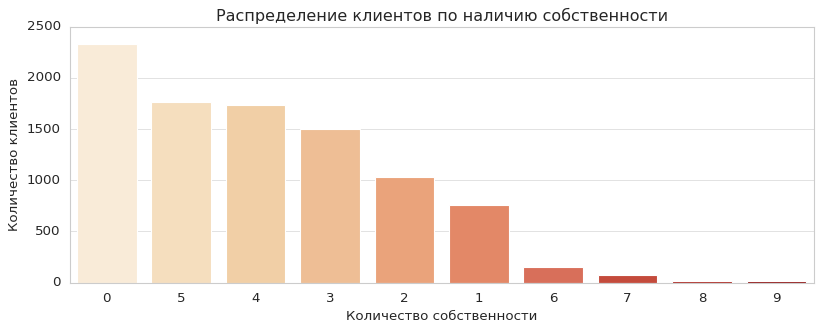

In [141]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
one = sns.barplot(x='equity', y='count', 
                  data=equity_count,
                  order=equity_count.sort_values('count',ascending = False).equity,
                  palette='OrRd')
one.set_title("Распределение клиентов по наличию собственности")
one.set_xlabel('Количество собственности')
one.set_ylabel('Количество клиентов')

plt.show()

Самые крупные группы клиентов - это клиенты без собственности, с 5 объектами и четырьмя. Разница между клиентами с 5 и 4 объектами собственности - минимальна. Меньше всего пользователей с 9, 8 и 7 объектами собственности.

Сложно объяснить связь между численностью клиентов и количеством собственности: сокращение собственности необязательно ведет к увеличению числа клиентов(и наоборот!) - клиентов банка с 1 объектом или двумя сильно меньше, чем с четырьмя и пятью.


Посмотрим, как связаны пол и количество собственности. Посмотрим, какую долю занимают клиенты с различным количеством собственности среди мужчин и женщин

In [142]:
sex_equity_count = df.groupby(['gender', 'equity']).size().reset_index(name='count')
sex_equity_count = sex_equity_count.merge(df.groupby('gender').size().reset_index(name='total'), on='gender',
                                          how='inner')
sex_equity_count['percent'] = round(sex_equity_count['count'] / sex_equity_count['total'] * 100)
sex_equity_count = sex_equity_count.sort_values(by='count', ascending=False)
sex_equity_count.head()


,gender,equity,count,total,percent
10,М,0,1249,4621,27.0
0,Ж,0,1080,4752,23.0
4,Ж,4,915,4752,19.0
5,Ж,5,891,4752,19.0
15,М,5,876,4621,19.0


    
Отобразим количество клиентов женского и мужского пола, которые владеют кредитной картой в зависимости от пола    


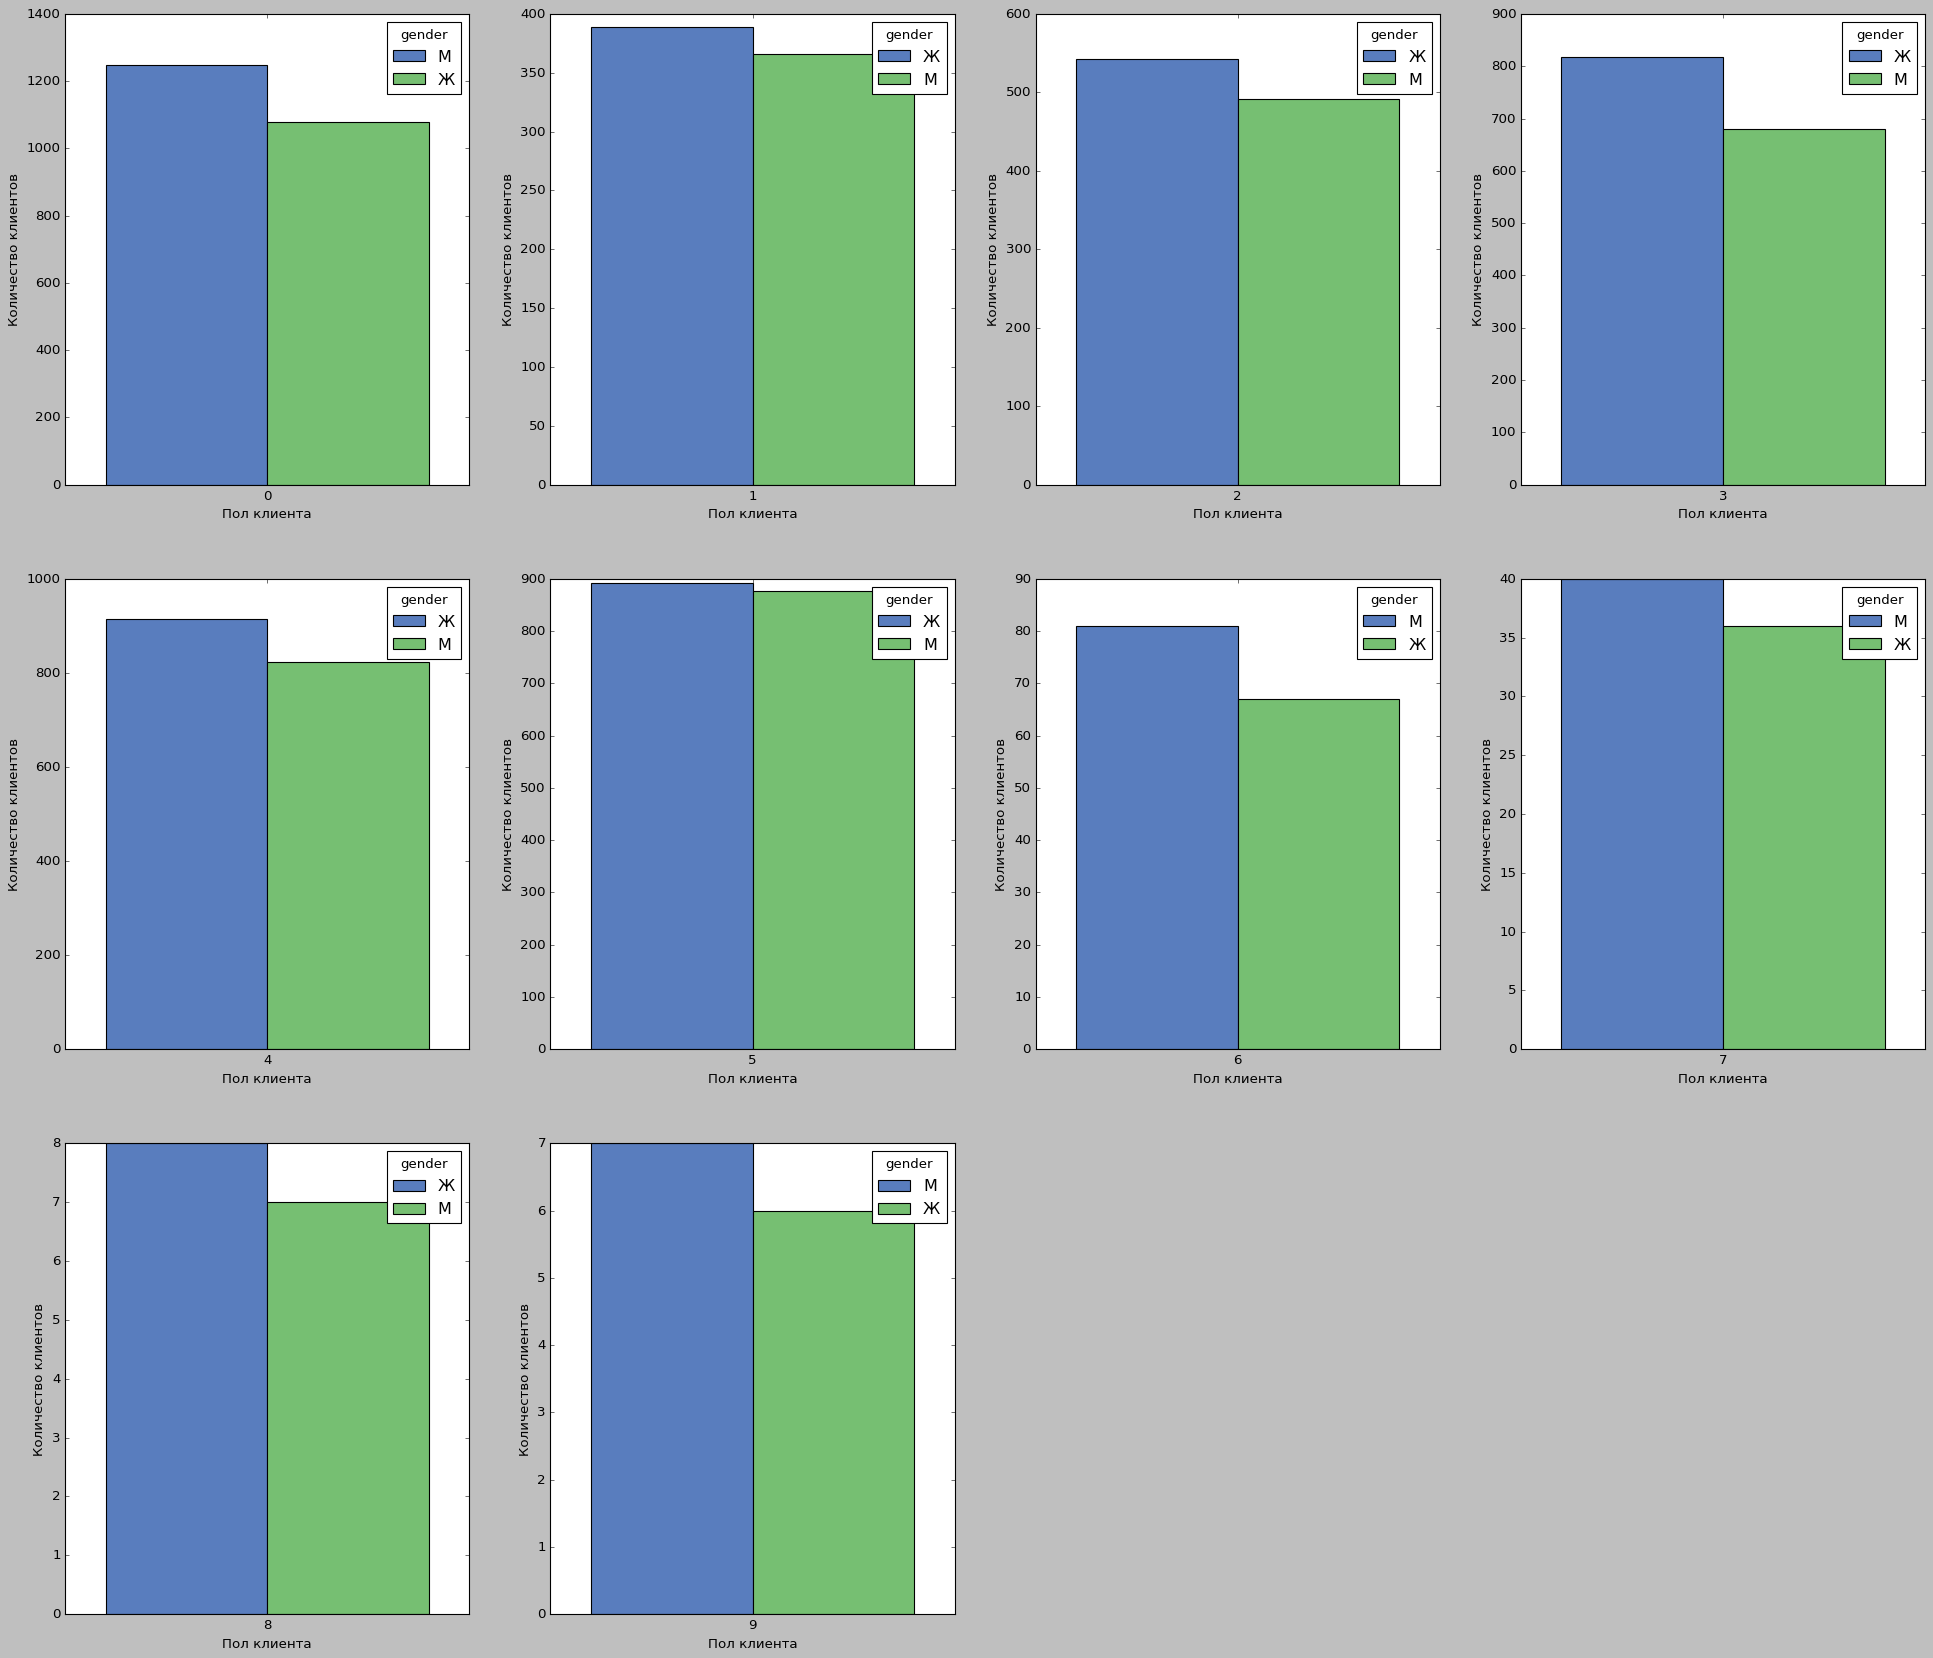

In [151]:
plt.figure(figsize=(30, 25))
plt.style.use('seaborn-muted')
for x, equity in enumerate(sorted(df['equity'].unique())):
    sns.barplot(data=sex_equity_count.query('equity == @equity'),
                 x='equity',
                 y='count',
                 hue = 'gender',
                 ax=plt.subplot(3, 4, x+1))
    
    plt.ylabel('Количество клиентов')
    plt.xlabel('Пол клиента')
plt.show()

Мужчин, которые не имеют собственности или имеют шесть и семь объетов больше женщин. Во всех остальных случаях женщин больше.

### Посчитаем корреляцию между признаками

Построим матрицу корреляции для числовых признаков

In [142]:
# создаем таблицу, где буду созданы столбцы с полом и городом, а значениям новых столбцов приписан числовой признак - 1,
# если у клиента совпадает город или пол, 0 - не совпадает
df_for_corr = pd.get_dummies(df, columns=['city', 'gender'])
# удалим столбец с юзер айди, он нам не нужен для расчета
df_for_corr = df_for_corr.drop('user_id', axis=1)
df_for_corr.head(2)

,score,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,850,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,861,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0


In [143]:
#создадим матрицу корреляционную 
corr = df_for_corr.corr().round(2)
corr.head(2)

,score,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
score,1.00,-0.02,0.04,0.14,-0.03,-0.08,-0.03,0.16,0.09,-0.03,0.01,0.01,0.00,-0.00
age,-0.02,1.00,0.02,0.15,0.01,-0.12,-0.01,-0.07,-0.05,0.05,0.03,-0.06,0.22,-0.22


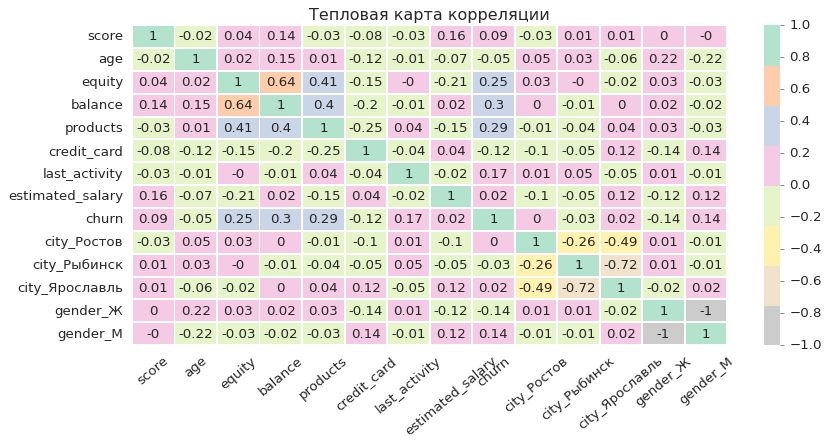

In [144]:
# строим тепловую карту
plt.figure(figsize=(12,5))
ax = sns.heatmap(corr, annot=True, cmap='Pastel2_r', linewidth=0.8)
sns.set_style('whitegrid')
ax.set_title('Тепловая карта корреляции')
ax.tick_params(axis='x', rotation=40)
plt.show()

В основе своей между признаками корреляции нет. Имеется высокий коэффициент корр. между количеством денег на счету и количеством собственности (0.64); количеством банковских продуктов, которыми пользуется клиент и количеством собственности (0.41); оттоком и продуктами (0.29); оттоком и собственность(0.25)

Мы познакомились с данными и имеем общие представления, что из себя представляют наши клиенты. Это приблизительно 50% мужчин и женщин из трёх городов – Ярославль, Рыбинск и Ростов, где большая часть из Ярославля – 58%. По городам полового дисбаланса не происходит – по каждому городу примерно 50 на 50. В основе своей наши клиенты молодые состоявшиеся люди – самый большой сегмент от 32 до 37 лет, которые держат сотни тысяч на депозитных счетах и имеют заработную плату выше средней. 68% имеют кредитную карту, а также предпочитает пользоваться скромным количеством банковских продуктов – подавляющее большинство от 1 до 2.  Клиенты, которые имеют собственность – это большинство, а среди тех, кто имеет – самые часто встречающиеся – это с пятью, четырьмя и тремя объектами собственности. Причем женщин, которые имеют собственность немного больше, чем мужчин, однако мужчин, которые не имеют немного больше, чем женщин, которые не имеют собственности. Мы рассчитали коэффициент корреляции между имеющими признаками и обнаружили, что явной связи, по большей части, между динамиками значений признаков нет, за исключением: количеством денег на счету клиента и количеством собственности; количеством собственности и количеством банковских продуктов, которыми пользуется клиент; оттоком и количеством продуктов банковских; оттоком и собственностью. Платежеспособность клиентов банк оценивает хорошо: клиентов с низким скоринговым рейтингом мало, а большинство клиентов имеют рейтинг 780-920 - как мужчины, так и женщины.

## Сегментация ушедших клиентов.

Посмотрим, какую долю занимают клиенты, которые прекратили пользоваться банковскими услугами

In [145]:
print('Доля отточных клиентов:', round(df.query('churn == 1')['user_id'].count() / df['user_id'].count() * 100), '%')

Доля отточных клиентов: 18 %


Создадим датафрейм с ушедшими клиентами

In [146]:
churn = df.query('churn == True')

Признаки клиентов, доступные нам, можно раз разделить на две группы: демографически-географическая и финансово-экономическая.
К первой относятся место проживания, пол и возраст клиента.
К финансово-экономической - все остальные: количесвто собственности, денежные средства на счету и заработная плата, количество продуктов банковских и наличие кредитной карты.

Мы будем производить сегментацию по двум названным выше характеристикам. Изучим и воспроизведем социально-географический и финансово-экономический портрет клиентов, которые решили покинуть банк.


Проведем сегментацию по двум блокам, сравнивая с аналогичным сегментом по всем клиентам.

### Демографически-географические данные клиентов

#### География отточных клиентов

Посмотрим, как распределены клиенты по городам 

In [147]:
city_churn = churn.groupby('city').size().reset_index(name='count')
# считаем какую долю составляют клиенты из разных городов относительно всех ушедших
city_churn['share'] = round(city_churn['count'] / churn['user_id'].count() * 100)
city_churn

,city,count,share
0,Ростов,252,15.0
1,Рыбинск,406,24.0
2,Ярославль,1005,60.0


In [148]:
fig = px.bar(city_churn, 
             x='count', y='city',
             
             
             title='Количество ушедших клиентов из каждого города',
             
             )

fig.update_xaxes(tickangle=15)
fig.update_xaxes(title_text='Количество клиентов')
fig.update_yaxes(title_text='Город')

fig.show() 

Посмотрим какую долю занимают клиенты из разных городов

In [149]:
fig = go.Figure(data=[go.Pie(labels=city_churn['city'], 
                             values=city_churn['count'],
                             hole=.228)])
fig.update_layout (title='Ушедшие клиенты по каждому городу')
fig.show() 

Большинство ушедших клиентов из Ярославля - 60%, из Рыбинска 24% и из Ростова 15%.

Распределение покинувших клиентов по городам резонирует общему распределение клиентов по городам, проделанному выше, где из Ярославля 58%, Рыбинска 27% и Ростова 15%.

Посчитаем долю оттока по сегменту: какую долю ушедшие клиенты составляют от аналогичного сегмента по датасету

In [150]:
city_churn = city_churn.merge(df.groupby('city').size().reset_index(name='all_count'), on='city', how='inner')
city_churn['churn_%'] = round(city_churn['count'] / city_churn['all_count'] * 100, 2)
city_churn

,city,count,share,all_count,churn_%
0,Ростов,252,15.0,1388,18.16
1,Рыбинск,406,24.0,2554,15.90
2,Ярославль,1005,60.0,5431,18.50


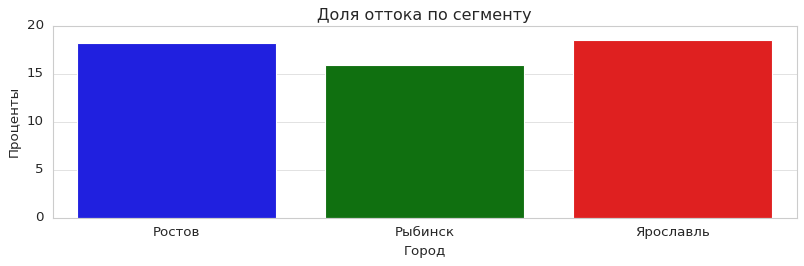

In [151]:
plt.figure(figsize=(12,3))
city_distribution = sns.barplot(x='city', y='churn_%', 
                                    data=city_churn, 
                                   )
city_distribution.set_title("Доля оттока по сегменту")
city_distribution.set_xlabel('Город')
city_distribution.set_ylabel('Проценты')

plt.show()

18% ярославцев и ростовчан покинуло банк, из Рыбинска 16%.

#### Возраст ушедших клиентов

Посмотрим к каким возрастным группам относятся ушедшие клиенты разных городов

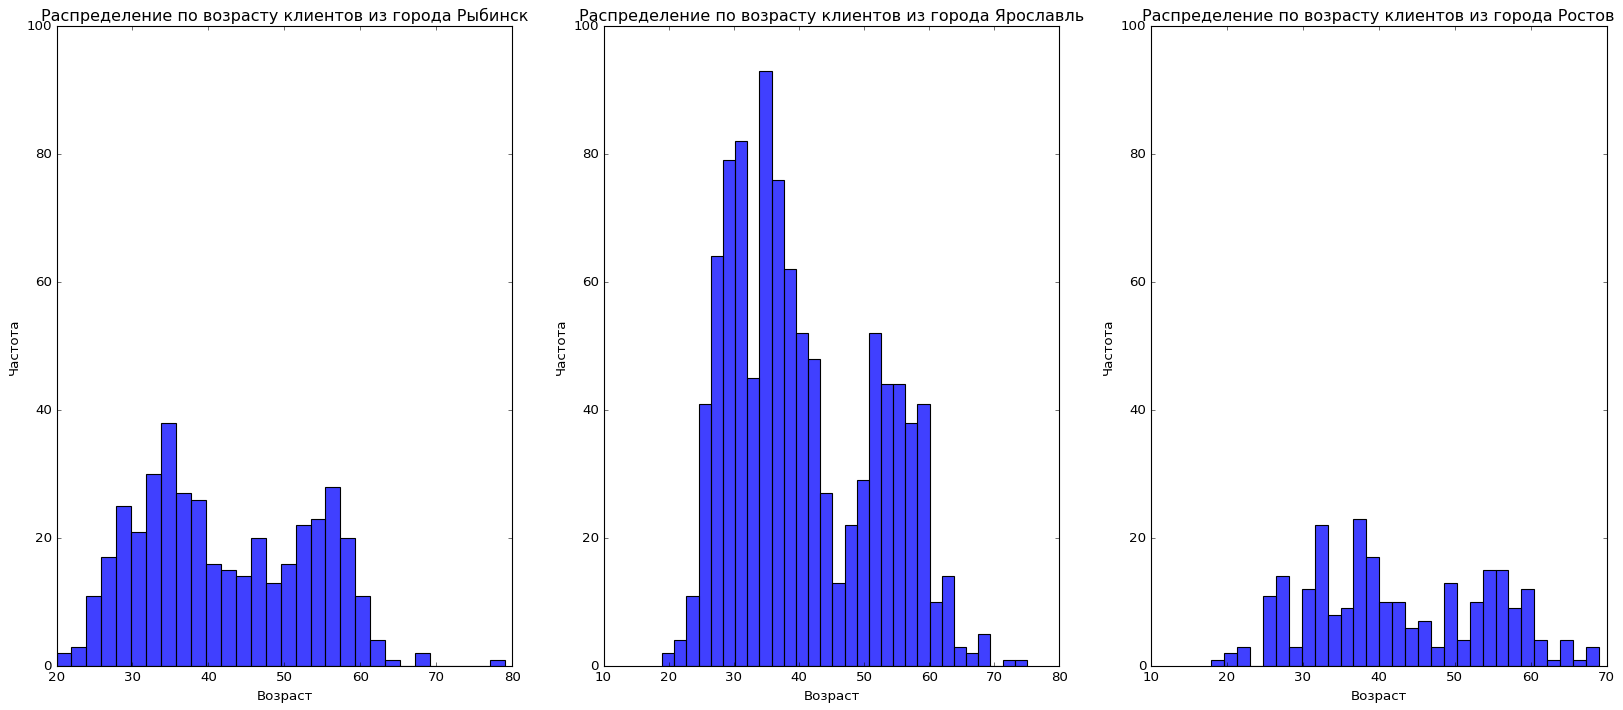

In [152]:
plt.figure(figsize=(25, 10))
plt.style.use('classic')
for x, city in enumerate(churn['city'].unique()):
    sns.histplot(churn.query('city == @city'),
                 x='age',
                 
                 bins=30,
                 ax=plt.subplot(1, 3, x + 1))
    plt.title('Распределение по возрасту клиентов из города {}'.format(city))
    plt.ylabel('Частота')
    plt.ylim(0, 100)
    plt.xlabel('Возраст')
    
plt.show()

Сравним с диаграммой по всему датасету

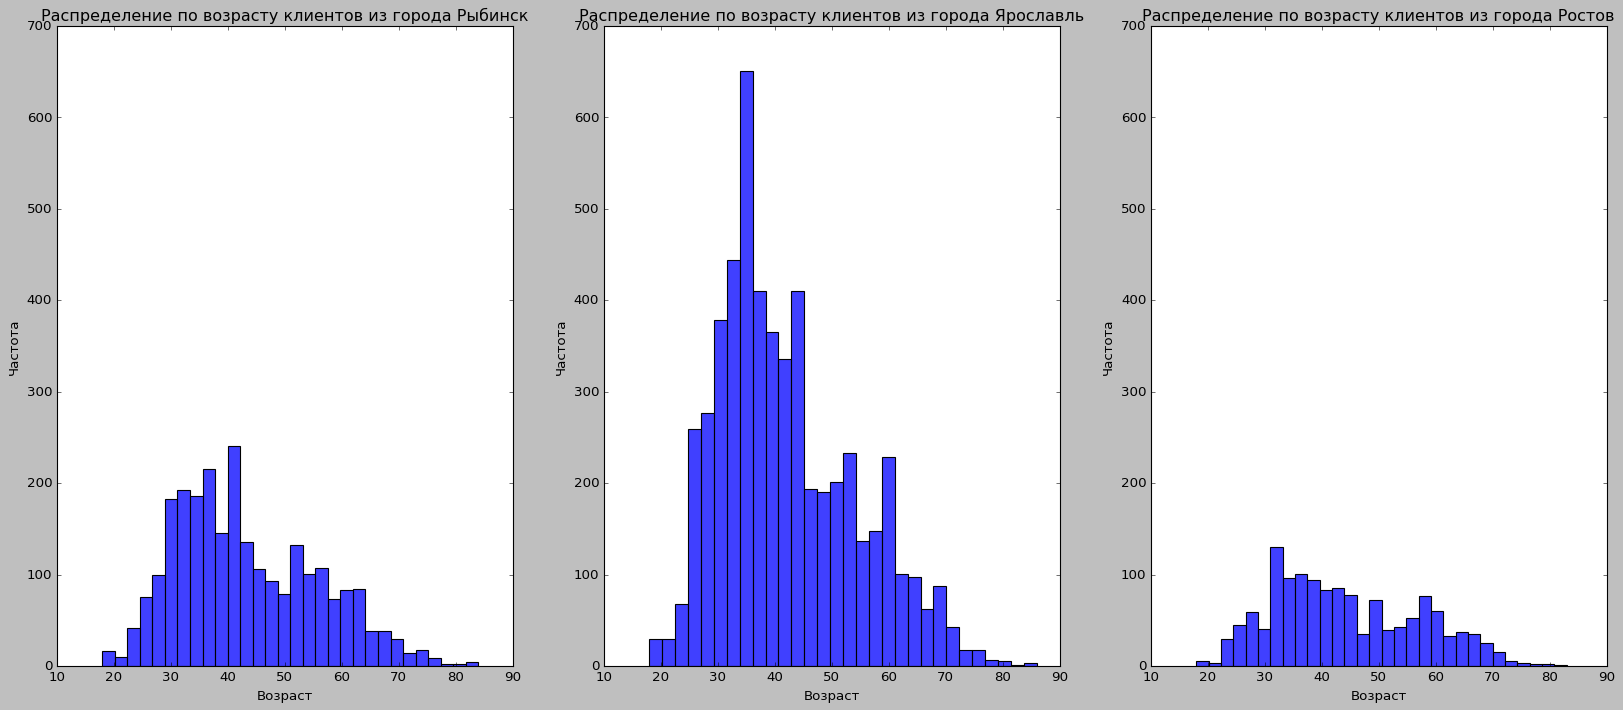

In [153]:
plt.figure(figsize=(25, 10))
plt.style.use('classic')
for x, city in enumerate(df['city'].unique()):
    sns.histplot(df.query('city == @city'),
                 x='age',
                 
                 bins=30,
                 ax=plt.subplot(1, 3, x + 1))
    plt.title('Распределение по возрасту клиентов из города {}'.format(city))
    plt.ylabel('Частота')
    plt.ylim(0, 700)
    plt.xlabel('Возраст')
    
plt.show()

Обобщая сравнение распределения ушедших клиентов по городам с общим можно увидеть, что основная часть клиентов принадлежит к диапозону 25-40 лет и всплеском в диапозоне 50-60 лет. У Ярославля и Ростова имеются падения в возрасте 32 и 32-34; и 44-46 и 44-50 лет соответственно. Для жителей Рыбинска ушедших характерно более плотное распределение по всем возрастам с падением 40-50 лет. Отличаются пики: для Ростова 33 и 37 (по общему 33), для Ярославля 36-37(об общему 34-35), для Рыбинска 35-36(по общему ~42 года)

Можно скзаать, что, в целом, гистограмма соотносится с общими за исключением разграничительных падений в некоторых диапозонах обозначенных выше.

Посчитаем уровень оттка

In [154]:
age_churn = churn.groupby(['city', 'age']).size().reset_index(name='count')
age_churn = age_churn.merge(df.groupby(['city', 'age']).size().reset_index(name='all_count'), on=['city', 'age'], how='inner')
age_churn['churn_%'] = round(age_churn['count'] / age_churn['all_count'] * 100, 2)
age_churn = age_churn.sort_values(by='churn_%', ascending=False)



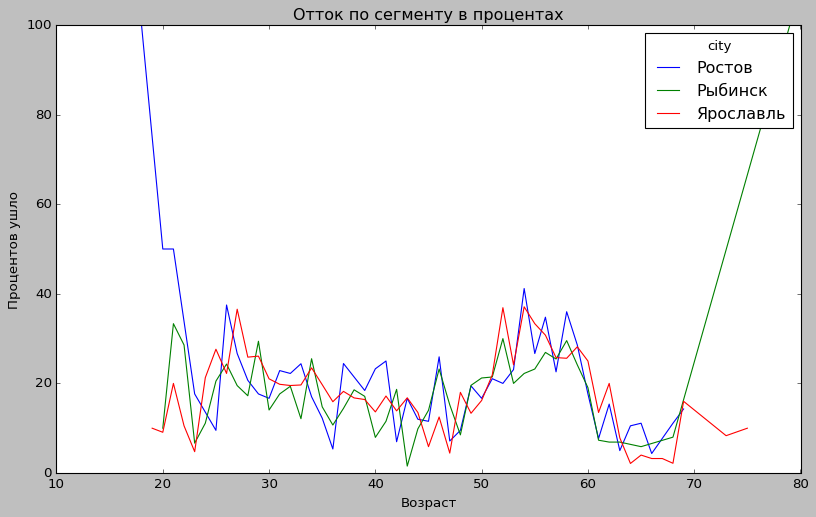

In [155]:
plt.figure(figsize=(12, 7)) 
ax = sns.lineplot(x='age', y='churn_%', hue='city',  data=age_churn)
plt.title('Отток по сегменту в процентах')
plt.ylabel('Процентов ушло')
plt.xlabel('Возраст')
plt.show()

Для ростовчан клиенты в возрасте все клиенты в возрасте 18 лет покинули банк, а для Рыбинска все клиенты в возрасте 79 лет покинули банк, с оговоркой, что и там и там были по 1 клиенту. В основе совей отток по возрастному сегменту не превышает 40%.

#### Половой сегмент

Посмотрим сколько мужчин и женщин среди ушедших

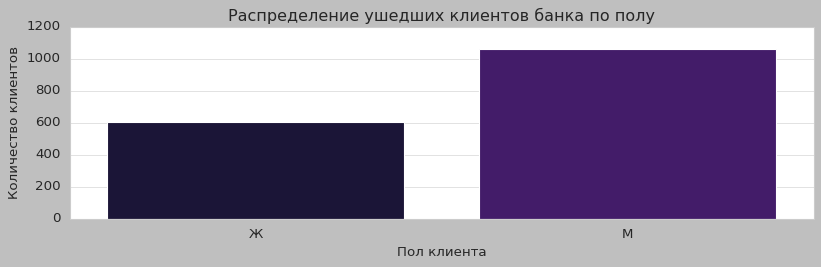

In [156]:
plt.figure(figsize=(12,3))
sns.set_style('whitegrid')
palette = ('magma')
sex_distribution = sns.barplot(x='gender', y='count', 
                                    data=churn.groupby('gender').size().reset_index(name='count'), 
                                    palette=sns.color_palette(palette, 8))
sex_distribution.set_title("Распределение ушедших клиентов банка по полу")
sex_distribution.set_xlabel('Пол клиента')
sex_distribution.set_ylabel('Количество клиентов')

plt.show()

Посмотрим на это в процентном выражении

In [157]:
sex_churn = churn.groupby('gender').size().reset_index(name='count')

In [158]:
fig = go.Figure(data=[go.Pie(labels=sex_churn['gender'], values=sex_churn['count'], hole=.123)])
fig.update_layout (title='Доли мужчин и женщин среди покинувших банк клиентов')
fig.show() 

64% ушедщих - мужчтны и 36% женщины. Учитывая, что у нас ~ 50 на 50 мужчин и женщин в датасете, можно заключить, что мужчины уходят чаще.

Посчитаем отток:  доля ушедших мужчин и женщин от общей доли по датасету

In [159]:
sex_churn = sex_churn.merge(df.groupby('gender').size().reset_index(name='all_count'), on='gender', how='inner')
sex_churn['churn_%'] = round(sex_churn['count'] / sex_churn['all_count'] * 100, 2)
sex_churn = sex_churn.sort_values(by='churn_%', ascending=False)
sex_churn.style.background_gradient(cmap='Blues')


,gender,count,all_count,churn_%
1,М,1062,4621,22.980000
0,Ж,601,4752,12.650000


Ушедшие мужчины составляют 23% от всех клиентов мужского пола и 13% женщин от всех клиентов женского пола

Посмотрим доли мужчин и женщин по каждому из городов

In [160]:
city_gender_churn = churn.groupby(['city', 'gender']).size().reset_index(name='count').sort_values(by='count', ascending=False)
# добавим столбец с совокупным количеством ушедших клиентов из города
city_gender_churn = city_gender_churn.merge(city_churn[['city', 'count']], on='city', how='inner' ).rename(
    columns={'count_y':'total', 'count_x':'count'})
city_gender_churn['%'] = round(city_gender_churn['count'] / city_gender_churn['total'] * 100, 2)
city_gender_churn


,city,gender,count,total,%
0,Ярославль,М,624,1005,62.09
1,Ярославль,Ж,381,1005,37.91
2,Рыбинск,М,274,406,67.49
3,Рыбинск,Ж,132,406,32.51
4,Ростов,М,164,252,65.08
5,Ростов,Ж,88,252,34.92


In [161]:
fig = px.bar(city_gender_churn, x='%',
             y='city', color='gender', 
             title='Доля ушедших мужчин и женщин', 
             width=1000, height=600,
            text = city_gender_churn['%'])
fig.update_layout (
    yaxis_title = 'Город', 
    xaxis_title='%',

    legend_title='Пол клиента',
    autosize=False
    )

fig.update_xaxes(tickangle=45)
fig.show() 

В каждом городе доля ушедших женщин и мужчин разделена более менее равномерно: мужчин от 62% до 67%, женщин от 32% до 38%

Посчитаем отток

In [162]:
city_gender_churn = city_gender_churn.merge(df.groupby(['city', 'gender']).size().reset_index(name='all_count'), on=['city', 'gender'], 
                                            how='inner')
city_gender_churn['churn_%'] = round(city_gender_churn['count'] / city_gender_churn['all_count'] * 100, 2)
city_gender_churn = city_gender_churn.sort_values(by='churn_%', ascending=False)
city_gender_churn

,city,gender,count,total,%,all_count,churn_%
4,Ростов,М,164,252,65.08,665,24.66
0,Ярославль,М,624,1005,62.09,2718,22.96
2,Рыбинск,М,274,406,67.49,1238,22.13
1,Ярославль,Ж,381,1005,37.91,2713,14.04
5,Ростов,Ж,88,252,34.92,723,12.17
3,Рыбинск,Ж,132,406,32.51,1316,10.03


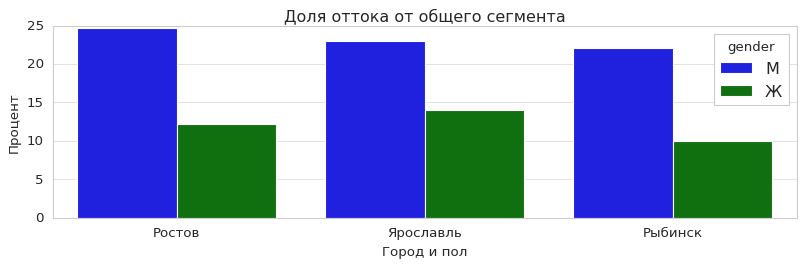

In [163]:
plt.figure(figsize=(12,3))
sex_distribution = sns.barplot(x='city', y='churn_%', hue='gender',
                                    data=city_gender_churn )
sex_distribution.set_title("Доля оттока от общего сегмента")
sex_distribution.set_xlabel('Город и пол')
sex_distribution.set_ylabel('Процент')

plt.show()

Доля оттока мужчин и женщин не имеет видимых перекосов в пользу того или иного города и согласуется с общим оттоком по полу, посчитанному выше(13% для женщин и 23% мужчин): процент ушедших мужчин по каждому городу от общего количества в данном горде варьируется от 22% до 25%, а отток женщин от 10% до 14%

### Финансово-экономические данные

#### Рейтинг клиентов

Узнаем, как оценивал наших клиентов сам банк. Глянем на скоринговый рейтинг попращавшихся с банком клиентов

In [164]:
fig = px.histogram(churn,
             x='score', 
             nbins=50,
             
             title='Распределение клиентов банка по скоринговому рейтингу')
fig.update_xaxes(tickangle=10)
fig.update_xaxes(title_text='Рейтинг')
fig.update_yaxes(title_text='Количество клиентов')
fig.show() 

В основе своей ушедшие клиенты обладают высоким скоринговым рейтингом. Пик - 860-870. Основная часть расположена в 820-900, однако клинты по всему датафрейму также обладают аналогично выскоими рейтингом, рассмотренным в ИАД. 

#### Кредитные карты и ушедшие пользователи

Узнаем, сколько клиентов имело кредитную карту

In [165]:
fig = go.Figure(data=[go.Pie(labels=churn['credit_card'], hole=.123)])
fig.update_layout (title='Доля клиентов, которые имели кредитную карту')
fig.show()

56% имело кредитную карту - на 12% меньше, общей доли владельцев кредитной карты, которую считали выше - 68%

Посчитаем отток 

In [166]:
churn_credit_card = churn.groupby('credit_card').size().reset_index(name='count')
churn_credit_card = churn_credit_card.merge(df.groupby(['credit_card']).size().reset_index(name='all_count'), on='credit_card', 
                                            how='inner')
churn_credit_card['churn_%'] = round(churn_credit_card['count'] / churn_credit_card['all_count'] * 100, 2)
churn_credit_card = churn_credit_card.sort_values(by='churn_%', ascending=False)
churn_credit_card

,credit_card,count,all_count,churn_%
0,0,726,2967,24.47
1,1,937,6406,14.63


25% от клиентов, не имющих кредитную карту, покинуло банк и 15% у кого она была

#### Сегментация по собственности клиентов

In [167]:
churn_equity = churn.groupby('equity').size().reset_index(name='count')
churn_equity['%'] = round(churn_equity['count'] / churn['equity'].count() * 100, 2)
churn_equity = churn_equity.sort_values(by='count', ascending=False)

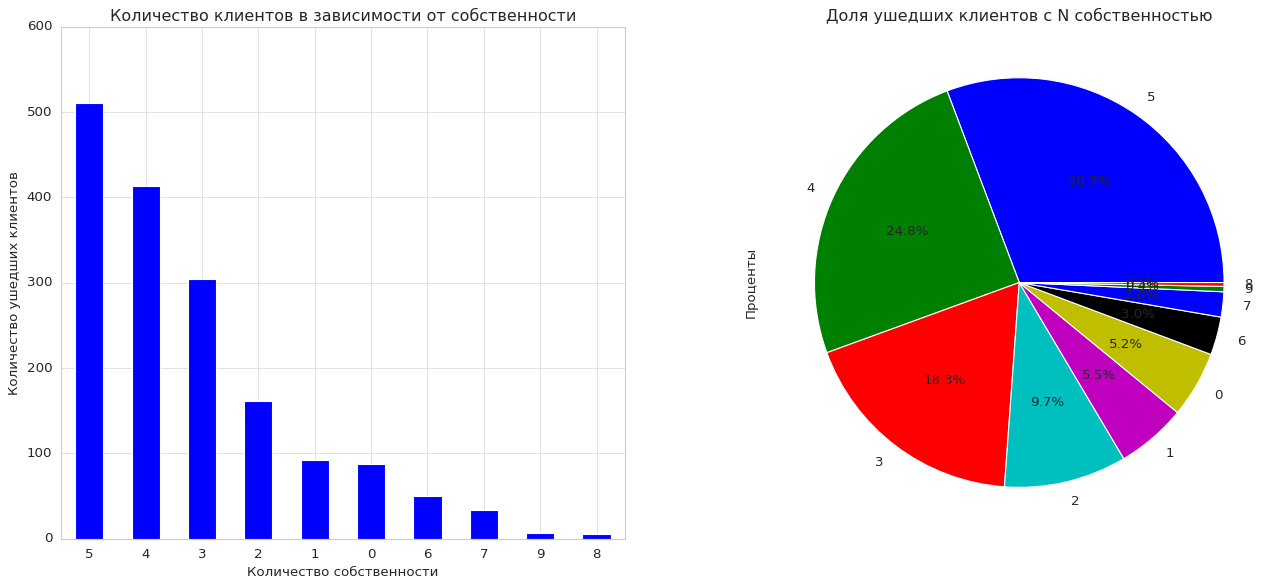

In [168]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
churn_equity.plot(ax=ax1, x='equity', y='count', kind='bar', legend=False, 
                  title='Количество клиентов в зависимости от собственности', xlabel='Количество собственности',
                 ylabel='Количество ушедших клиентов', rot=0)
churn_equity.plot(ax=ax2, x='equity', y='%', kind='pie', autopct='%1.1f%%', legend=False, 
                  title='Доля ушедших клиентов с N собственностью', ylabel='Проценты')

plt.show()


Большая часть ушедших клиентов имела 5 объектов собственности (31%). 

Четырьмя - 25%

Тремя - 18%

Двумя - 10%

Одним - 5.5%

Нулем - 5%

Посчитаем отток 

In [169]:
churn_equity = churn_equity.merge(df.groupby(['equity']).size().reset_index(name='all_count'), on='equity', 
                                            how='inner')
churn_equity['churn_%'] = round(churn_equity['count'] / churn_equity['all_count'] * 100, 2)
churn_equity = churn_equity.sort_values(by='churn_%', ascending=False)


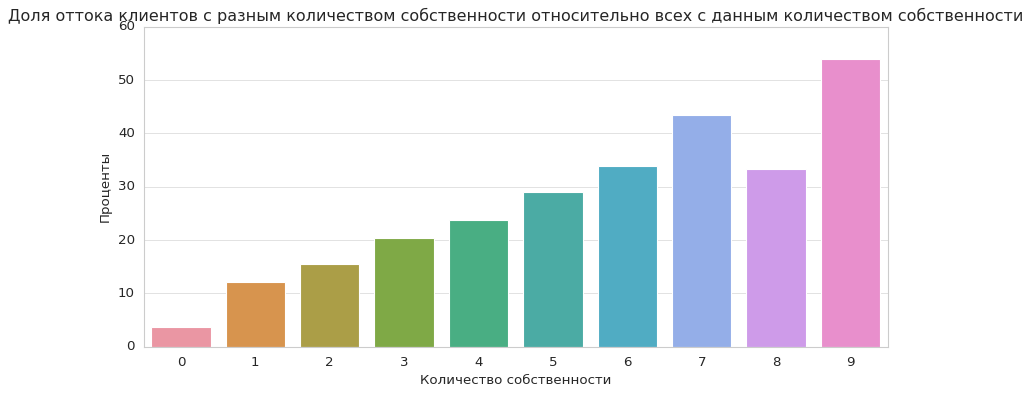

In [170]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
catering_distribution = sns.barplot(x='equity', y='churn_%', data=churn_equity)
catering_distribution.set_title("Доля оттока клиентов с разным количеством собственности относительно всех с данным количеством собственности")
catering_distribution.set_xlabel('Количество собственности')
catering_distribution.set_ylabel('Проценты')
plt.show()

1 место - 9 объектов собственности - отток по сегменту 54%
2 место - 7 объектов собств. - отток по сегменту 43%
3 место 6 объектов собств. - отток по сегменту 34
4 место - 8 объектов собств. - отток по сегменту 33% 
Можно сказать, что с  увеличением собственности растет доля клиентов, которые покинули банк относительно всех клиентов с данным коичеством собственности. 

#### Продуктовая сегментация

In [171]:
churn_products = churn.groupby('products')['products'].count().reset_index(name='count')
churn_products['%'] = round(churn_products['count'] / churn['products'].count() * 100, 2)
churn_products = churn_products.sort_values(by='%', ascending=False)
churn_products

,products,count,%
2,2,899,54.06
3,3,269,16.18
4,4,262,15.75
1,1,224,13.47
5,5,8,0.48
0,0,1,0.06


In [172]:
fig = px.bar(churn_products, x='products', y='count', color='%',
             title='Количество продуктов, которыми пользовались ушедшие клиенты')
fig.update_xaxes(tickangle=45)
fig.update_xaxes(title_text='Количество продуктов')
fig.update_yaxes(title_text='Доля пользователей')
fig.update_layout(xaxis={'categoryorder':'total ascending'})


fig.show() 

Большинство клиентов пользовались двумя банковскими продуктами - 54%.
Доля пользователей, которые пользовались одним, тремя и четырьмся варьируется от 13 до 16%.

Посчитаем оттока сегмента

In [173]:
churn_products = churn_products.merge(df.groupby(['products']).size().reset_index(name='all_count'), on='products', 
                                            how='inner')
churn_products['churn_%'] = round(churn_products['count'] / churn_products['all_count'] * 100, 2)
churn_products = churn_products.sort_values(by='churn_%', ascending=False)
# удалим расчеты с нулем продуктом , т.к. там только один пользователь
churn_products = churn_products.query('products != 0')
churn_products

,products,count,%,all_count,churn_%
2,4,262,15.75,423,61.94
4,5,8,0.48,19,42.11
1,3,269,16.18,968,27.79
0,2,899,54.06,4885,18.40
3,1,224,13.47,3077,7.28


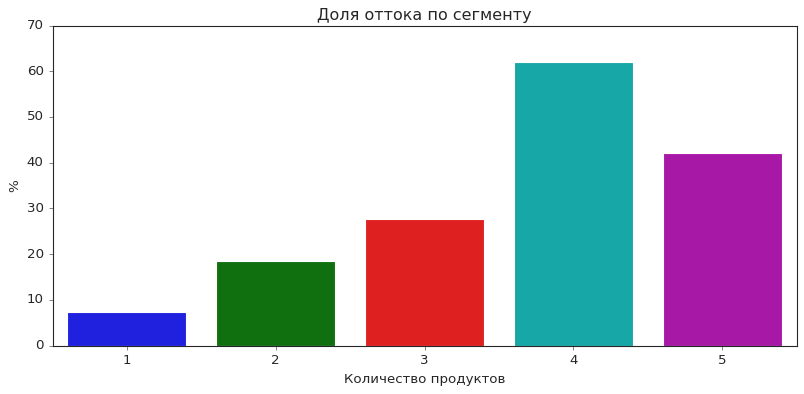

In [174]:
plt.figure(figsize=(12,5))
sns.set_style('ticks')
catering_distribution = sns.barplot(x='products', y='churn_%', data=churn_products)
catering_distribution.set_title("Доля оттока по сегменту")
catering_distribution.set_xlabel('Количество продуктов')
catering_distribution.set_ylabel('%')
plt.show()

Самые отточные клиенты с четырьмя продуктами - 62%, затем с пятью 42% и тремя - 28%. 
В целом также тенденция, что и для собственности: с увеличением количества продуктов у клиента - растет доля ушедших относительно всех клиентов с данным количеством продуктов

#### Банковские продукты и собственность

Узнаем больше про связь между количеством продуктов и количеством собственности

In [175]:
churn_equity_products = churn.groupby(['equity', 'products']).size().reset_index(name='count')

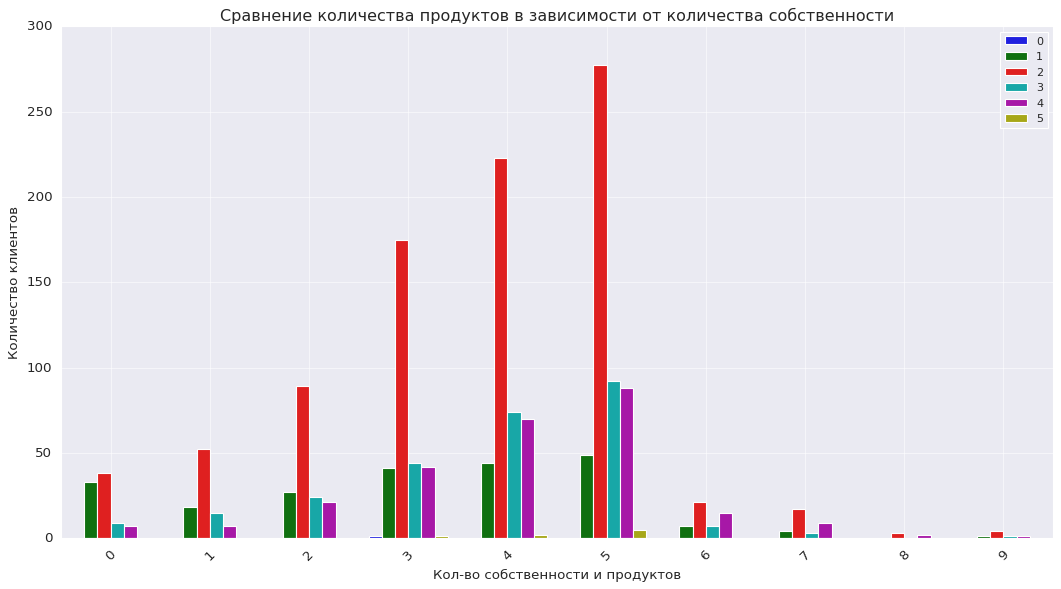

In [176]:
sns.set_style('dark')
plt.figure(figsize=(16, 8))
sns.barplot(x='equity', y='count', data=churn_equity_products, hue='products')
plt.title('Сравнение количества продуктов в зависимости от количества собственности')
plt.xlabel('Кол-во собственности и продуктов')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

Среди всех клиентов с разным количеством собственности - большинство пользовалось 2 продуктами. Однако отток по сегменту с двумя продуктами оказался не самый высокий (18%), т.к. большиство клиентов и так пользуется небольшим количеством банковских продуктов. Если видимая связь: клиенты, которые ушли, состставляли большую долю среди всех клиентов, которые пользовались множеством банковских продуктов.

Посчитаем отток от общего количества клиентов по собственности и продуктам 

In [177]:
churn_equity_products = churn_equity_products.merge(df.groupby(['equity', 'products']).size().reset_index(name='all_count'), 
                                                    on=['equity', 'products'], 
                                            how='inner')
churn_equity_products['churn_%'] = round(churn_equity_products['count'] / churn_equity_products['all_count'] * 100, 2)
churn_equity_products = churn_equity_products.sort_values(by='count', ascending=False)


In [178]:
# отсеим строки, где мало клиентов в принципе
churn_equity_products = churn_equity_products.query('all_count >=10')

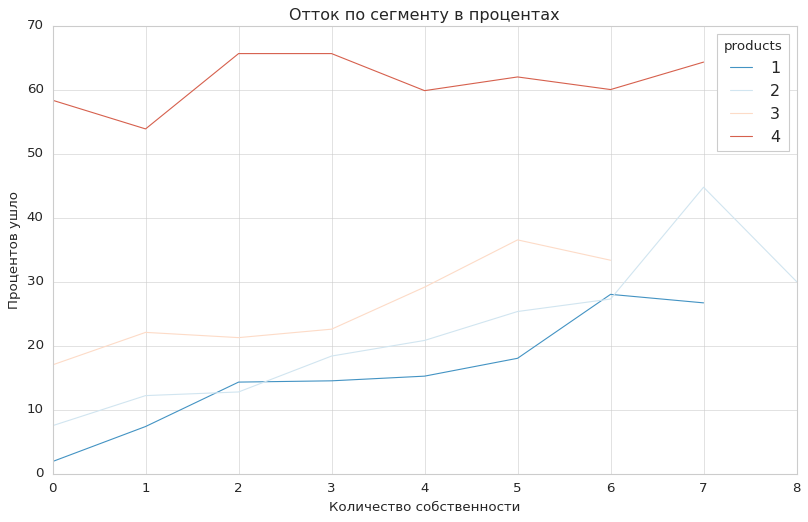

In [181]:
plt.figure(figsize=(12, 7)) 
sns.set_style('whitegrid') 
palette = ('RdBu_r')
ax = sns.lineplot(x='equity', y='churn_%', hue='products',  data=churn_equity_products, palette=sns.color_palette(palette, 4))
plt.title('Отток по сегменту в процентах')
plt.ylabel('Процентов ушло')
plt.xlabel('Количество собственности')
plt.savefig('my_plot.png')
plt.show()

Самая рискованная группа - это клиенты, пользующиеся 4 продуктами банковскими - отток по ним составляет от 60 до 65 процентов независимо от количества собственности у клиента с данным количеством продуктов. 

Мы провели сегментацию ушедших клиентов банка в разрезе двух характеристик – демографически-географическая и финансово-экономическая и теперь более-менее представляем, какими уникальными чертами данные клиенты выделяются. Географически клиенты не отличаются от общего распределение всех клиентов по городам, но выделяются по полу: примерно 65% клиентов относятся к мужчинам и 35% к женщинам по городам и в совокупности. 

Отток мужчин и женщин по городам относительно  разделения всех клиентов в районе 22-25% для мужчин и 10-14% для жещин. По отношение к возрасту клиенты в зависимости от города имеют небольшие отличия, но самая массовая группа отточных клиентов – это группы в диапазонах 25-40 лет и 50-60 лет с оттоком от аналогичного сегмента по всему датасету выше от 25 до 40%
Ушедшие клиенты не выделяются скоринговым рейтингом от общего распределения. 

Около 56 процентов клиентов имели кредитную карту также имели кредитную карту.
Отличительной чертой ушедших клиентов является большое количество собственности: с увеличением собственности растет доля ушедших относительно всех клиентов с аналогичным количеством собственности. 
Большинство наших клиентов (54%) пользовались двумя банковскими продуктами. Одним, тремя и четырьмя – от 13 до 16 процентов, а пятью всего полпроцента. Однако, при расчете оттока - какую долю клиенты с разным количеством банковских продуктов занимали относительно всех клиентов с аналогичным количеством банковских продуктов, выясняется, что для клиентов с четырьмя продуктами отток составляет 62% - самая уязвимая рискованная группа клиентов, с пятью 42%, а с тремя 28%. Т.е., чем  каждым новым продуктом, которые подключает для себя клиент, растет вероятность потерять данного клиента. Отток клиентов с четырьмя продуктами мало связан с количеством собственности:  в зависимости от количества собственности отток и так высок и варьируется от 60 до 65%


## Статистический тест

### Равенство возрастов

$\begin{equation*}
 \begin{cases}
H_0 :\text{Средний возраст клиентов, которые пользуется одним продуктом банка и клиентами, которые пользуются двумя продуктами одинаковый }\\
H_1 :\text{Средний возраст клиентов, которые пользуется одним продуктом банка и клиентами, которые пользуются двумя продуктами различаются}
 \end{cases}
\end{equation*}$

Используем тест Стьюдента для сравнения равенства двух генеральных совокупностей


In [227]:
# создаем спиоск, который будет хранить возраст клиентов, пользующихся одним продуктом
age_one_product = list(df.query('products == 1')['age'])
# создаем спиоск, который будет хранить возраст клиентов, пользующихся двумя продуктами
age_two_product = list(df.query('products == 2')['age'])


In [228]:
alpha = .05
results = st.ttest_ind(age_one_product, age_two_product)

In [229]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.0243173552031508
Отвергаем нулевую гипотезу


### Равенство долей

$\begin{equation*}
 \begin{cases}
H_0 :\text{Доли клиентов с разным количеством банковских продуктов среди ушедших и не ушедших равны}\\
H_1 :\text{Доли клиентов с разным количеством банковских продуктов среди ушедших и не ушедших различаются}
 \end{cases}
\end{equation*}$

In [230]:
# таблица с клиентами не ушедшими
not_churn = df.query('churn != 1')
# считаем количество клиентов, которые пользуются разным количеством продуктов банковских
share_not_churn = not_churn.groupby('products')['products'].count().reset_index(name='not_churn_count')
# присоединим ноавую сгруппированную таблицу с аналогичной для клиентов ушедших, сделанную ранее
churn_and_not_churn = share_not_churn.merge(churn_products[['products', 'count']], on='products', how='inner')
churn_and_not_churn

,products,not_churn_count,count
0,1,2853,224
1,2,3986,899
2,3,699,269
3,4,161,262
4,5,11,8


Создадим переменные, которые будут хранить данные совокупном количестве клиентов

In [231]:
# кол-во клиентов, которые не ушли
count_not_churn = not_churn['products'].count()
# кол-во клиентов, которые ушли
count_churn = churn['products'].count()
print(count_not_churn)
print(count_churn)

7710
1663


Для расчета воспользуемся Z-критерием:

$$Z \approx \frac{P_1 - P_2} {\sqrt {P(1-P)(1/n_1 + 1/n_2)}} \sim N(0,1)$$

Поскольку мы проверяем одну и ту же гипотзу 5 раза(такое количество продуктов в банке), то возрастает шанс получить ошибку первого рода - отвергнуть нулевую гипотезу при её истинности. Для минимизации ошибки воспользуемся поправкой **Шидака**, которая нас будет страховать от ошибочного отказа гипотезы:

$$ {a}={a}_2=...={a}_m=1-(1-a)^{1/m} $$

In [115]:
alpha = 1 - (1- 0.05)**(1/5)


In [116]:
def ztest(a1, a2, count1, count2):
    #вычисляем пропорции
    p1 = a1/count1
    p2 = a2/count2
    #считаем пропорцию в комбинированной группе
    p_combined = (a1 + a2) / (count1 + count2)
    # вычисляем разницу в пропорциях
    difference = p1 - p2
    # задаем норм. распредление
    distr = st.norm(0, 1)
    # считаем z-значение
    z_value  = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/count1 + 1/count2))
    
    p_value = (1 - distr.cdf(abs(z_value)))*2
    
    print('p_value:', p_value)
    
    if p_value < alpha: 
        print('Отвергаем Н0')
    else:
        print('Не отвергаем Н0')

In [117]:
for i in churn_and_not_churn.index:
    print(churn_and_not_churn.loc[i, 'products'])
    ztest(churn_and_not_churn.loc[i, 'not_churn_count'], churn_and_not_churn.loc[i, 'count'], count_not_churn, count_churn)
    print()

1
p_value: 0.0
Отвергаем Н0

2
p_value: 0.0806072548679091
Не отвергаем Н0

3
p_value: 0.0
Отвергаем Н0

4
p_value: 0.0
Отвергаем Н0

5
p_value: 0.0053925933532106285
Отвергаем Н0



Статистический тест показал, что вероятность принадлежности пропорций к одной генеральной совокупнсоти ниже уровня статистической значимсоти, за исключением пропорций относящимся к двум продуктам

## Вывод

Наше исследование началось с предобработки, где мы изменили названия столбцов, типы данных в столбцах, удалили выбросы и изучили немногочисленные дубликаты. В предобработки мы погрузились в изучение обильного количества пропусков в столбце с суммой на дебетовом счете клиента и выдвинули ряд предположений с чем они могли быть связаны.

В исследовательском анализе мы погрузились в изучение наших данных для формирования представлений о содержании наших данных: какая доля мужчин и женщин, из какого города клиенты, как распределены заработная плата/рейтинг/дебетовый счет клиентов банка и какого они возраста, сколько процентов имеют кредитную карту, каким количеством банковских продуктов предпочитают пользоваться, сколько имеют собственности и другое. Все вычисления мы сопроводили визуализацией. В дополнение, мы построили тепловую карту корреляций между признаками нашей таблицы. 

В дальнейшем части мы проделывали операции с целью разрешить проблему оттока клиентов, сегментируя данные в двух блоках признаков: географически-демографические и финансово-экономические. 

Клиентов, которые покинули банк объединяет собственность и количество используемых банковских продуктов. С ростом количества объектов собственности и количества продуктов растет сегмент пользователей, который отказываются от услуг банка. 

От остальных признаков, мало, что зависит, с небольшими оговорками: например, клиенты мужского пола чаще уходят, чем женщины. 

В ходе исследования мы выделили два сегмента, отличающиеся большим оттоком.
1.	Сегментация по количеству собственности. Уровень оттока клиентов, в разрезе по собственности, возрастает с увеличением количества собственности. Самой отточной группой являются клиенты с девятью и семью объектами собственности – 54 и 43 процента соответственно.  Данные клиенты являются одними из самых состоятельных, о чем говорит не только обилие собственности, но и имеющаяся положительная корреляция между количеством собственности и количеством денег на депозитном счету. Таким клиентам могут быть интересны:
1) Инвестиционные услуги: удобное и дешевое обслуживание брокерского счета для инвестиций и покупки валюты на бирже будет интересно отточным клиентам, которые, вероятнее всего, имеют инвестиционный опыт;
2) Возможности международных транзакция. Осуществление международных платежей, переводов, покупок ценных бумаг было бы интересно для такого сегмента клиентов;
3) Заботиться о репутации банка: не допускать опубличивания конфиденциальных данных и не быть навязчивым для клиента;
4) Широкая географическая доступность банка: наш банк представлен только в трёх городах и, во-первых, таким образом он отказывается от потенциальных клиентов из других городов, а во-вторых, вероятно отсекает от себя текущих клиентов, которые уезжают в другой город, где для нынешних клиентов могут быть более интересные банки с неусеченными возможностям – например, кэшбэки при оплате транспорта, коммунальных услуг, более дешевые кредиты и т.д.




2. Сегментация по количеству продуктов. Мы заметили связь между уровнем оттока клиентов и количеством банковских продуктов, которыми пользовались клиенты: с увеличением продуктов растет доля оттока по сегменту, где самый большой уровень оттока принадлежит клиентам, которые пользовались четырьмя банковскими продуктами. Количество продуктов тесно связано с количеством собственности, как мы увидели в ходе расчета корреляции и сегментации. Поэтому, все данные выше советы будут важны и для клиентов, которые пользуются большим количеством банковских продуктов. Мы не знаем, какими именно банковскими продуктами пользовались клиенты, однако можем дать универсальные советы: 
1) Обеспечивать качество финтеха: быстрота загрузки приложения, удобство интерфейса, легкость в осуществлении платежей и прочее.
2) Сотрудничество с бигтехками. Например, возможность осуществлять финансовые операции через посредничество сервисов бигтеха - выполнять платежи в интернет покупках через электронные кошельки;
3) Быстрое реагирование на проблемы клиентов - чем большим количеством банковских продуктов клиент пользуется, тем больше проблем у него могут возникнуть, которые могут быть связаны как с техническими аспектами со стороны банка, так и с неопытностью самого клиенты; 
4) Пероснализированный подход к взаимодействию клиентов - использовать данные о клиентах для определения потенциально интересных продуктов, которые банк может предложить;
5) Предоставление широких финансовых услуг: клиенты должны иметь возможность реализовать всевозможные на рынке банков операции – от оплаты штрафов или обучения, до анализа трат денежных средств;
6) Полезно было бы регулярно проводить тесты направленные на изучение клиентского опыта взаимодействия с банком. 

Все перечисленные советы могут помочь не только сократить отток клиентов, но и привлечению новых, развитию партнерских связей с иными организациями и повышению конкурентоспособности банка. 
